# Required Code


In [152]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
!pip install shap

In [154]:
!pip install catboost

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def plot_model_evaluation(y_test, y_pred):
    residuals = y_test - y_pred

    # Residuals vs Predictions Plot

    residuals = y_test - y_pred
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at 0
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.show()

    # Actual vs Predicted Plot
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    # Quantile-Quantile Plot (Q-Q Plot)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Error Distribution Histogram
    plt.figure(figsize=(6, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Error Distribution Histogram')
    plt.xlabel('Residuals')
    plt.show()

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Modelling

In [157]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_encoded.csv')
df = df.drop('Unnamed: 0', axis=1) #dropping the past index
df.head(5)

Instrument_encoded  TRBC_Industry_encoded  Year  Quarter  Month_x  Month_y  \
0                   1                     21  2022        4       12       10   
1                   1                     21  2022        4       12       10   
2                 145                     31  2022        4       12       10   
3                 145                     31  2022        4       12       10   
4                 145                     31  2022        4       12       10   

   Forward EV/EBITDA       Revenue  Gross Profit          EBIT  ...  \
0          16.485255  7.068353e+09  3.131764e+09  1.848803e+09  ...   
1          14.936336  7.068353e+09  3.131764e+09  1.848803e+09  ...   
2          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   
3          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   
4          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   

   fls_numerical  fls_classification_score           GDP  \
0              2                  0.961731  76398.591742   
1              2                  0.961731  76398.591742   
2              2                  0.964601  76398.591742   
3              2                  0.964601  76398.591742   
4              2                  0.975234  76398.591742   

   Stock traded pct GDP  Inflation pct  Unemployment Rate pct  \
0            193.056616         8.0028                   3.65   
1            193.056616         8.0028                   3.65   
2            193.056616         8.0028                   3.65   
3            193.056616         8.0028                   3.65   
4            193.056616         8.0028                   3.65   

   Government Debt pct GDP  Balance of Trade  Exchange Rate USD  \
0                76.964824     -9.453230e+11                1.0   
1                76.964824     -9.453230e+11                1.0   
2                76.964824     -9.453230e+11                1.0   
3                76.964824     -9.453230e+11                1.0   
4                76.964824     -9.453230e+11                1.0   

   Government Consumption pct GDP  
0                       10.296068  
1                       10.296068  
2                       10.296068  
3                       10.296068  
4                       10.296068  

[5 rows x 40 columns]

In [158]:
import pandas as pd
target= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_target_variables.csv')
#target = df.drop('Unnamed: 0', axis=1) #dropping the past index
target.head(5)

Instrument  Forward Enterprise Value To EBITDA (Daily Time Series Ratio)  \
0    POOL.OQ                                          15.585242              
1    POOL.OQ                                          15.366744              
2    POOL.OQ                                          15.453976              
3    POOL.OQ                                          15.056633              
4    POOL.OQ                                          14.846725              

   Enterprise Value To EBITDA (Daily Time Series Ratio)  \
0                                          16.200543      
1                                          15.973329      
2                                          16.153896      
3                                          15.738591      
4                                          15.519277      

   EV / Free Cash Flow (SmartEstimate ®)  P/E (Daily Time Series Ratio)  \
0                              31.632597                      20.229126   
1                              31.188947                      19.917965   
2                              31.541516                      20.165245   
3                              30.730606                      19.596499   
4                              30.302381                      19.296156   

   Forward P/E (Daily Time Series Ratio)  
0                              21.400266  
1                              21.073564  
2                              21.081195  
3                              20.488317  
4                              20.179335

In [159]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()
cols_to_impute = target.columns.drop('Instrument')
target[cols_to_impute] = imputer.fit_transform(target[cols_to_impute])

# Splitting in X and Y

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Separate input features and target variable
X = df.drop('Forward EV/EBITDA', axis=1) # drop the target variable and the date from the input features
y = target['EV / Free Cash Flow (SmartEstimate ®)']

In [161]:
import numpy as np

# Align the number of samples in X and y
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples]
y = y[:n_samples]

# Verify the updated shapes
print(X.shape)
print(y.shape)

(5558, 39)
(5558,)


## Split in train and test

In [162]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# The Baseline Valuation: testing the models

## Adaboost

In [50]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from math import sqrt

# AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)

# Compute MSE
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print("The mean squared error (MSE) on test set (AdaBoostRegressor): {:.4f}".format(mse_adaboost))

# Compute RMSE
rmse_adaboost = sqrt(mse_adaboost)
print("The root mean squared error (RMSE) on test set (AdaBoostRegressor): {:.4f}".format(rmse_adaboost))

#compute MAE:
mae = mean_absolute_error(y_test, y_pred_adaboost)
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

# Compute R^2 Score
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("The R^2 score on the test set (AdaBoostRegressor): {:.4f}".format(r2_adaboost))

The mean squared error (MSE) on test set (AdaBoostRegressor): 232.4673
The root mean squared error (RMSE) on test set (AdaBoostRegressor): 15.2469
The mean absolute error (MAE) on test set: 10.6066
The R^2 score on the test set (AdaBoostRegressor): 0.5513


### Model Evaluation Plots

- Residuals vs. Predictions Plot: This is a scatter plot of residuals (the difference between the actual and predicted values) against the predicted values. If your model is well-calibrated, the residuals should be randomly scattered around zero. Patterns in this plot can suggest that your model is struggling with certain areas of the feature space.

- Actual vs. Predicted Plot: This is a scatter plot of actual target values against predicted values. If your model is perfect, all points should lie along the diagonal line where actual value equals predicted value. Deviations from this line indicate areas where your model's predictions are inaccurate.

- Quantile-Quantile Plot (Q-Q Plot): This plot is used to check if the residuals follow a normal distribution. The residuals are plotted against a theoretical normal distribution in such a way that the points should form an approximate straight line. Deviations from this line may suggest a problem with the normality assumption.

- Error Distribution Histogram: A histogram or density plot of the residuals can show whether errors are normally distributed, which is an assumption of many regression models.

- Learning Curve: A learning curve shows model performance (typically, RMSE or another loss function) on the y-axis against the number of observations used for training on the x-axis. This can show whether your model might benefit from more data.


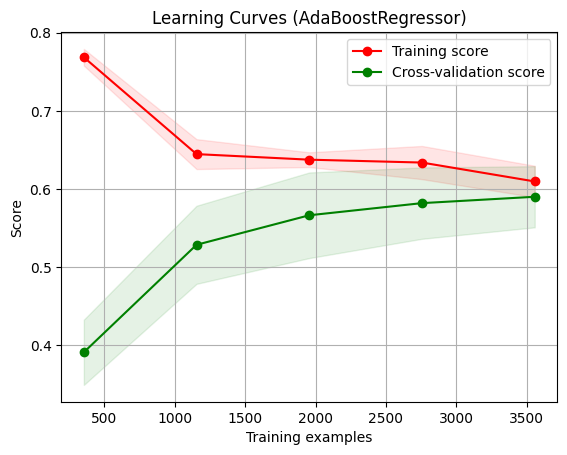

In [51]:
import numpy as np

# Assume we have our AdaBoostRegressor 'adaboost' and feature matrix X, and target vector y
X, y = np.array(X_train), np.array(y_train)
title = "Learning Curves (AdaBoostRegressor)"
plot_learning_curve(adaboost, title, X, y, cv=5, n_jobs=4)

plt.show()

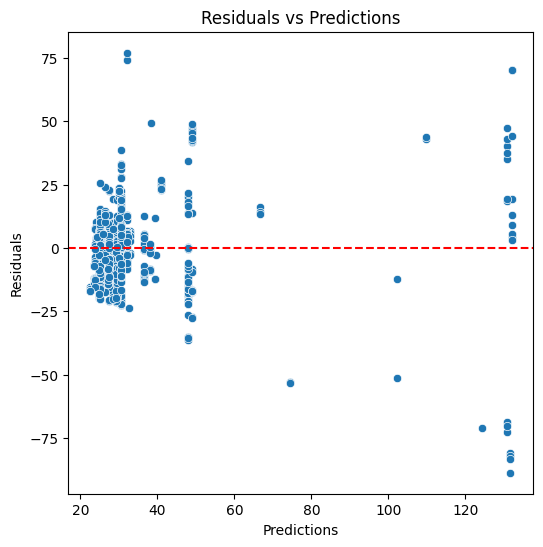

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Residuals vs. Predictions Plot:

residuals = y_test - y_pred_adaboost
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_pred_adaboost, y=residuals)
plt.axhline(0, color='r', linestyle='--')  # Add horizontal line at 0
plt.title('Residuals vs Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

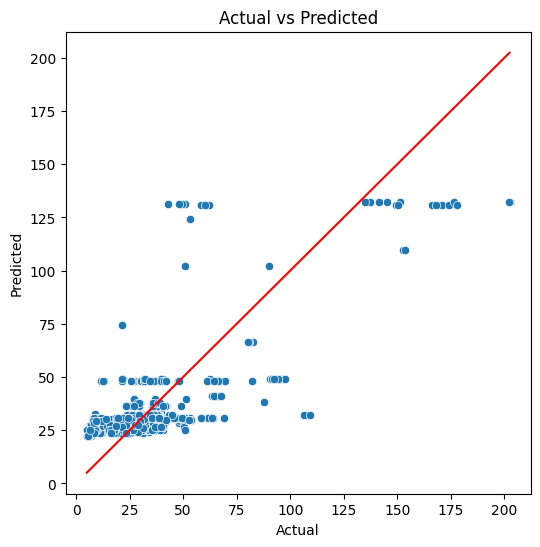

In [53]:
# actual vs predicted:

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_adaboost)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

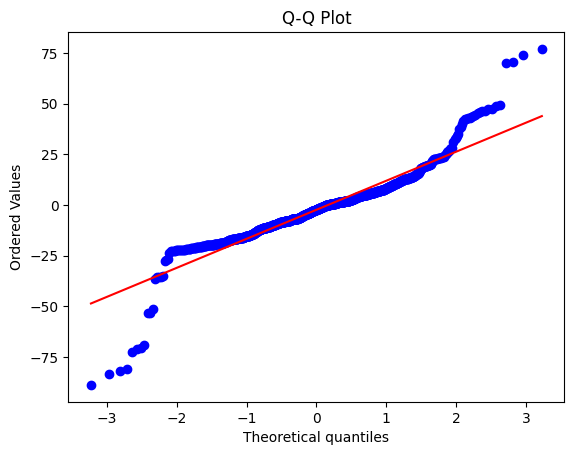

In [54]:
# Quantile-Quantile Plot (Q-Q Plot):

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

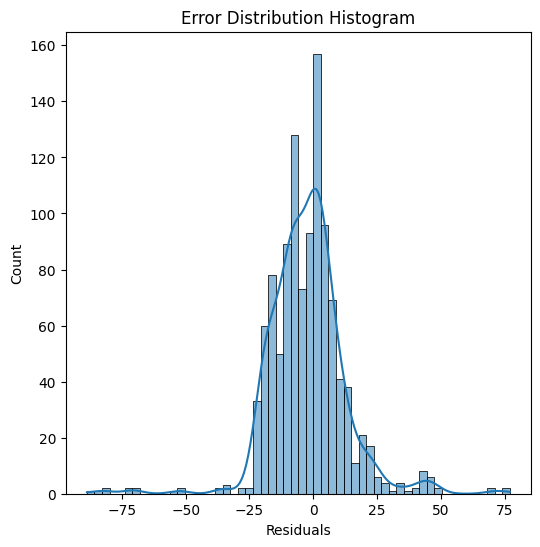

In [55]:
#Error Distribution Histogram:

plt.figure(figsize=(6, 6))
sns.histplot(residuals, kde=True)
plt.title('Error Distribution Histogram')
plt.xlabel('Residuals')
plt.show()

### Feature importance

In [56]:
X_train.columns

Index(['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter',
       'Month_x', 'Month_y', 'Revenue', 'Gross Profit', 'EBIT', 'EBITDA',
       'Total Assets', 'Total Liabilities', 'Enterprise Value',
       'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct',
       'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct',
       'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E',
       'sentiment_numerical', 'sentiment_score', 'esg_numerical',
       'esg_classification_score', 'fls_numerical', 'fls_classification_score',
       'GDP', 'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')

In [57]:
import plotly.express as px

# fit model and get importance as before
model = AdaBoostRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()}) # Ensure that the features are ordered based on their importance

fig.show()


In [58]:
import plotly.express as px

# fit model and get importance as before
model = AdaBoostRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})
fig.show()

## Histogradient Boost


In [59]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the model
histgb = HistGradientBoostingRegressor()
histgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_histgb = histgb.predict(X_test)

# Calculate metrics
mse_histgb = mean_squared_error(y_test, y_pred_histgb)
rmse_histgb = sqrt(mse_histgb)
r2_histgb = r2_score(y_test, y_pred_histgb)
mae_histgb = mean_absolute_error(y_test, y_pred_histgb)


print("The mean squared error (MSE) on test set: {:.4f}".format(mse_histgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_histgb))
print("The R^2 score on the test set: {:.4f}".format(r2_histgb))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_histgb))

The mean squared error (MSE) on test set: 72.5142
The root mean squared error (RMSE) on test set: 8.5155
The R^2 score on the test set: 0.8600
The mean absolute error (MAE) on test set: 2.9755


### Model Evaluation

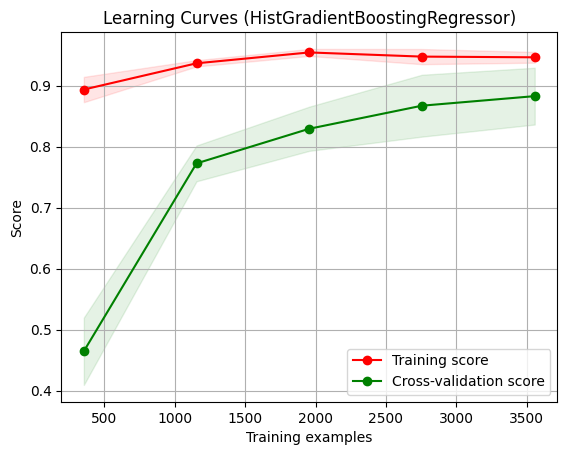

In [60]:
# Plot learning curve
plot_learning_curve(histgb, "Learning Curves (HistGradientBoostingRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

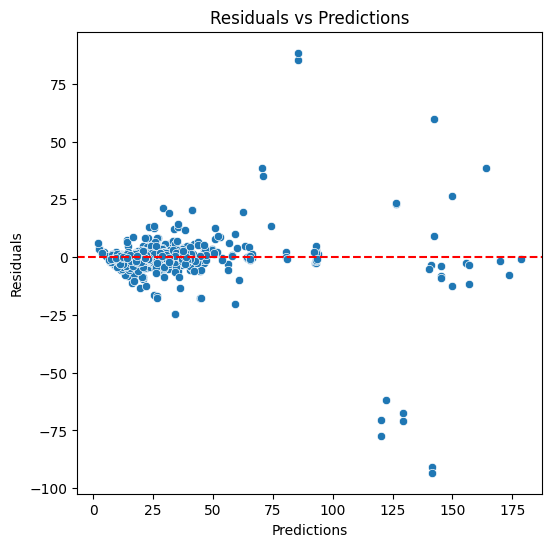

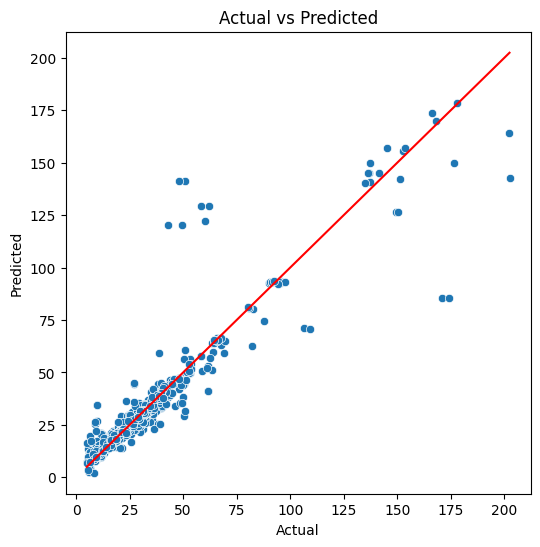

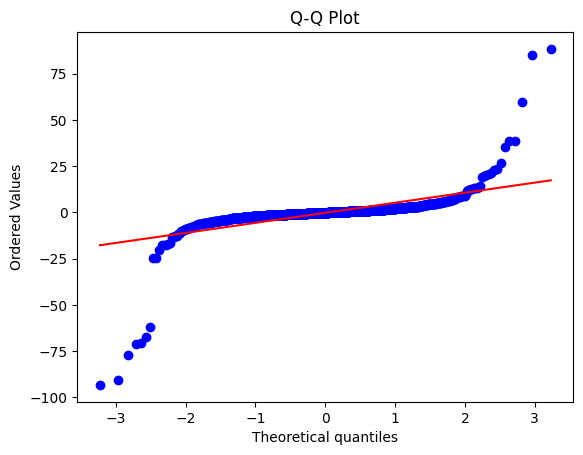

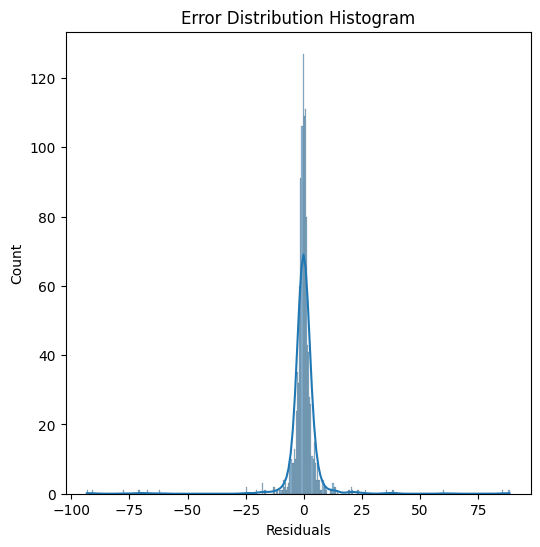

In [61]:
plot_model_evaluation(y_test, y_pred_histgb)

### Feature importance

In [62]:
from sklearn.inspection import permutation_importance

# fit the model
model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)

# perform permutation importance
results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean

# create a dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_test.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()})  # Ensure that the features are ordered based on their importance

fig.show()

## XGBRegressor

The mean squared error (MSE) on test set: 101.2256
The root mean squared error (RMSE) on test set: 10.0611
The R^2 score on the test set: 0.8046
The mean absolute error (MAE) on test set: 2.3119


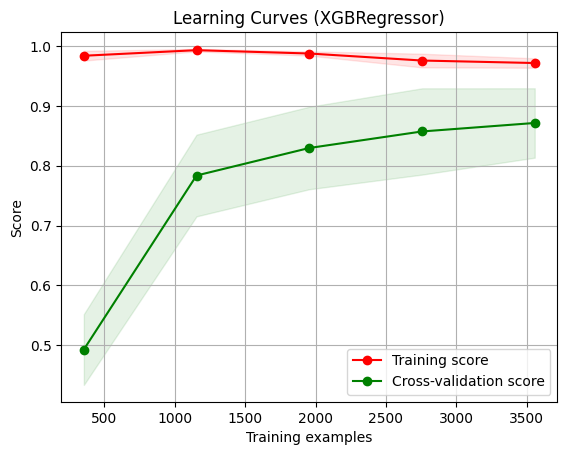

In [63]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
xgb_model = XGBRegressor(objective ='reg:squarederror')  # using squared error as our objective function
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)


print("The mean squared error (MSE) on test set: {:.4f}".format(mse_xgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_xgb))
print("The R^2 score on the test set: {:.4f}".format(r2_xgb))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_xgb))


# Plot learning curve
plot_learning_curve(xgb_model, "Learning Curves (XGBRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation Plots

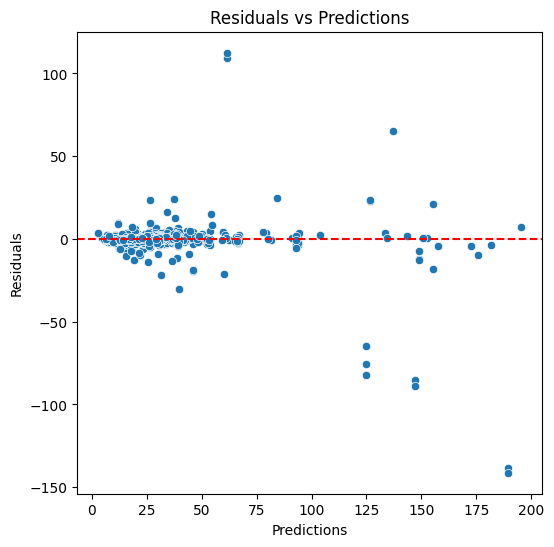

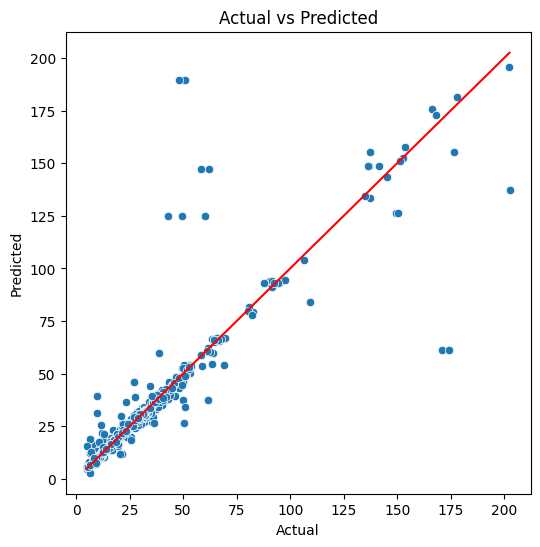

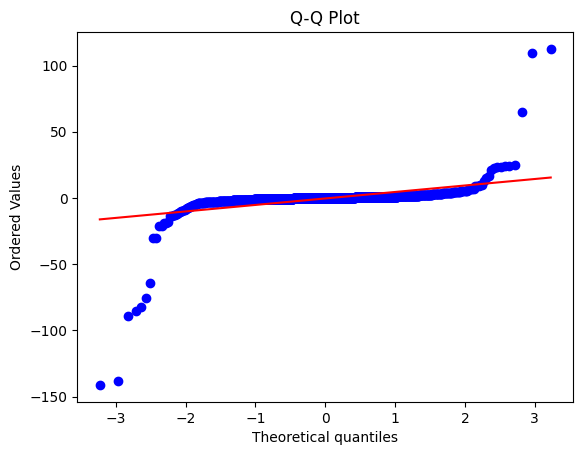

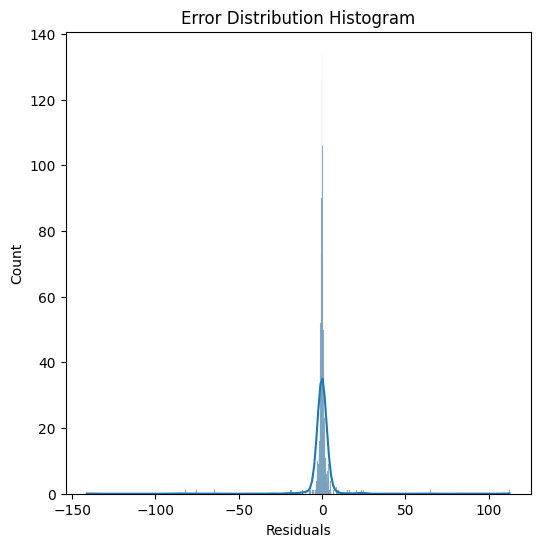

In [64]:
plot_model_evaluation(y_test, y_pred_xgb)

### Feature importance

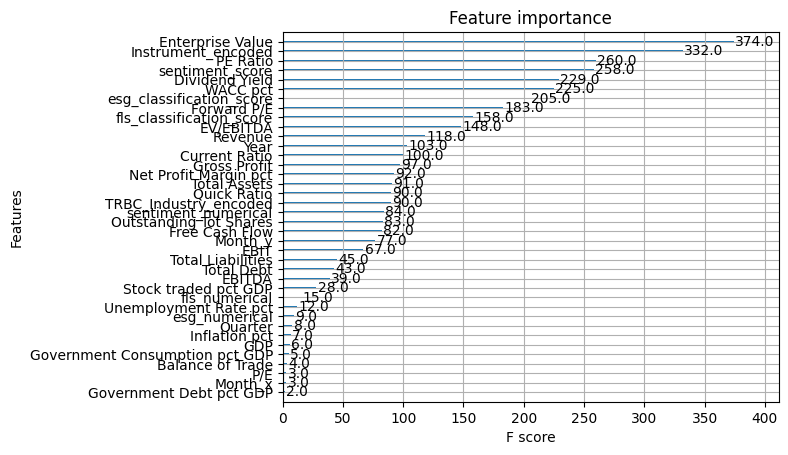

In [65]:
import matplotlib.pyplot as plt
import xgboost as xg

# Get feature importances
importances = xgb_model.feature_importances_

# Plot feature importances
xg.plot_importance(xgb_model)
plt.show()

why the differences=

- Metric Used: The plot_importance function in XGBoost uses a different default importance metric. While feature_importances_ uses the average gain of each feature when it is used in trees, plot_importance by default uses "weight", meaning the number of times a feature appears in a tree across all trees in the model. If you want to make the methods consistent, you can set the importance_type in plot_importance to "gain".

- Normalization: By default, feature_importances_ gives you the raw unnormalized values. However, the plot_importance function normalizes the importance values to sum up to 1. You can disable this by setting normalize=False.

In [66]:
import xgboost as xgb

# Train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Get feature importances
importance = model.feature_importances_

# create a dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'},
             category_orders={"Features": importance_df["Features"].tolist()})  # Ensure that the features are ordered based on their importance

fig.show()

In [67]:
from sklearn.model_selection import cross_val_score

# Instantiate the XGBRegressor model
xgb = XGBRegressor()

# Perform k-fold cross-validation
scores = cross_val_score(xgb, X_train, y_train, cv=10)

print("Cross-validated scores:", scores)

# Make cross-validated predictions
print("Average 5-Fold CV Score: {}".format(np.mean(scores)))

Cross-validated scores: [0.87689887 0.95936452 0.90828371 0.80166466 0.96332617 0.89680676
 0.77138162 0.93390559 0.95056623 0.89355076]
Average 5-Fold CV Score: 0.8955748884484521


## LightGBM

The mean squared error (MSE) on test set: 71.2655
The root mean squared error (RMSE) on test set: 8.4419
The mean absolute error (MAE) on the test set: 2.9880
The R^2 score on the test set: 0.8624


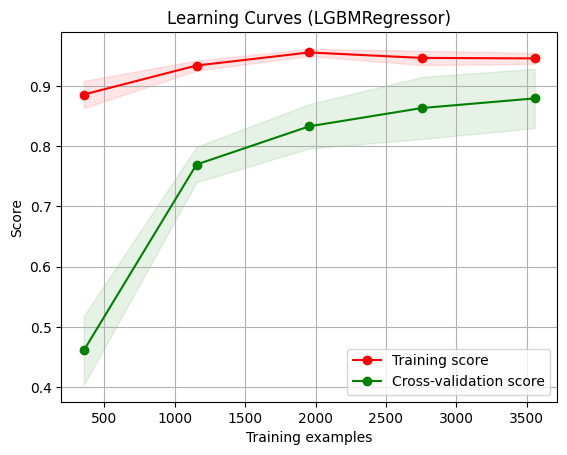

In [68]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
lgbm_model = LGBMRegressor(objective ='regression')  # using regression as our objective function
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae = mean_absolute_error(y_test, y_pred_lgbm)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm))
print(f"The mean absolute error (MAE) on the test set: {mae:.4f}")
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm))

# Plot learning curve
plot_learning_curve(lgbm_model, "Learning Curves (LGBMRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation plots

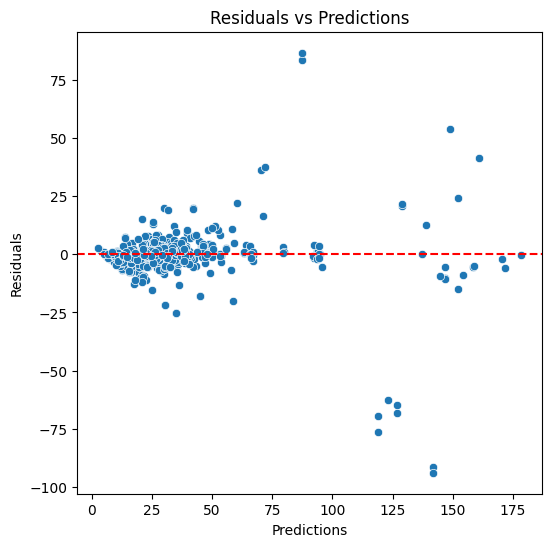

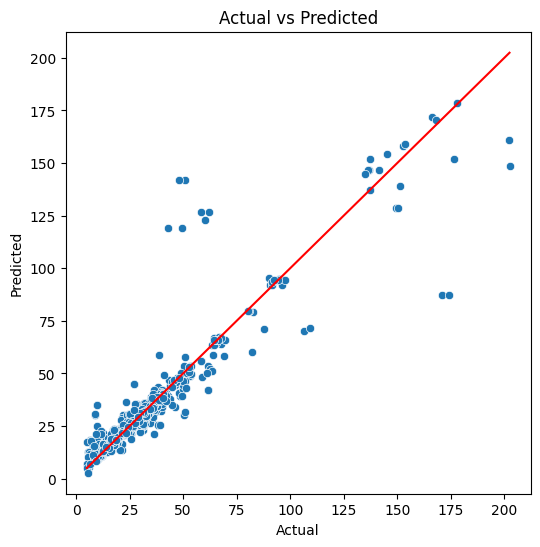

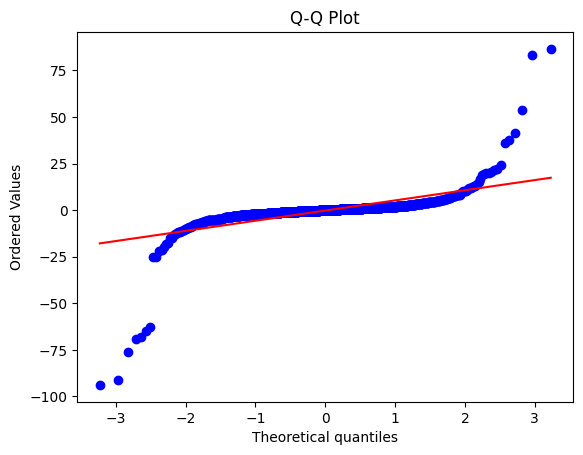

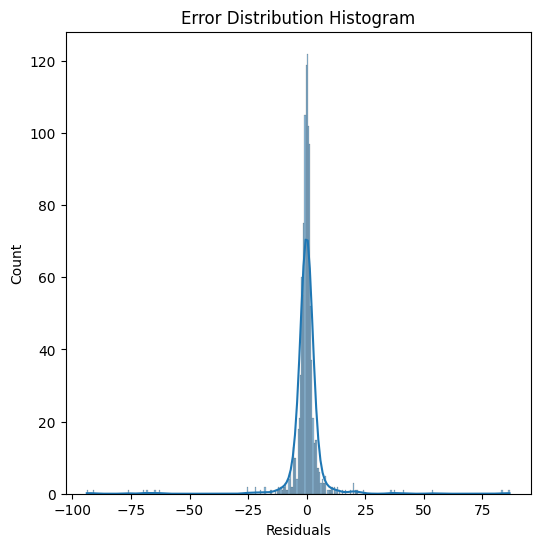

In [69]:
plot_model_evaluation(y_test, y_pred_lgbm)

### Feature importance

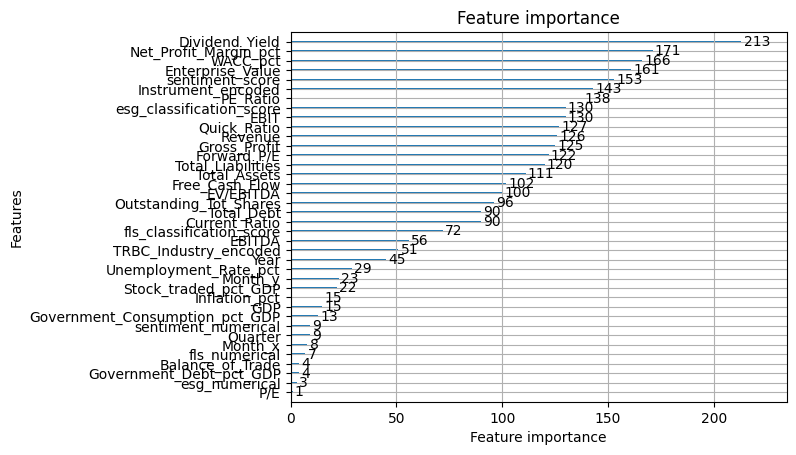

In [70]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# fit model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Use lightgbm's built-in function to plot feature importance
lgb.plot_importance(lgb_model)
plt.show()

In [71]:
# Custom plot using plotly
# get importance
importance = lgb_model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [202]:
# Custom plot using plotly
# get importance
importance = lgb_model.feature_importances_

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

# Update layout for white background and to remove title
fig.update_layout(yaxis={'categoryorder':'total ascending'},
                  paper_bgcolor='white',
                  plot_bgcolor='white',
                  title=None,
                  showlegend=True,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  xaxis_linecolor='black',
                  yaxis_linecolor='black',
                  xaxis_linewidth=2,
                  yaxis_linewidth=2)

fig.show()

## Catboost

Learning rate set to 0.051827
0:	learn: 23.5075074	total: 8.78ms	remaining: 8.77s
1:	learn: 23.0244130	total: 16.4ms	remaining: 8.17s
2:	learn: 22.5330633	total: 23.7ms	remaining: 7.87s
3:	learn: 22.0988768	total: 30.8ms	remaining: 7.67s
4:	learn: 21.6969730	total: 37.9ms	remaining: 7.55s
5:	learn: 21.3116094	total: 44.9ms	remaining: 7.43s
6:	learn: 20.9564398	total: 52.3ms	remaining: 7.42s
7:	learn: 20.6242304	total: 59.1ms	remaining: 7.33s
8:	learn: 20.3302699	total: 66.4ms	remaining: 7.31s
9:	learn: 20.1100882	total: 71.2ms	remaining: 7.05s
10:	learn: 19.8404240	total: 78.5ms	remaining: 7.06s
11:	learn: 19.5734043	total: 85.4ms	remaining: 7.03s
12:	learn: 19.2975296	total: 92.4ms	remaining: 7.02s
13:	learn: 19.0471383	total: 99.9ms	remaining: 7.04s
14:	learn: 18.7364550	total: 109ms	remaining: 7.17s
15:	learn: 18.4790700	total: 116ms	remaining: 7.13s
16:	learn: 18.1311165	total: 123ms	remaining: 7.11s
17:	learn: 17.9043166	total: 130ms	remaining: 7.1s
18:	learn: 17.7577261	total: 13

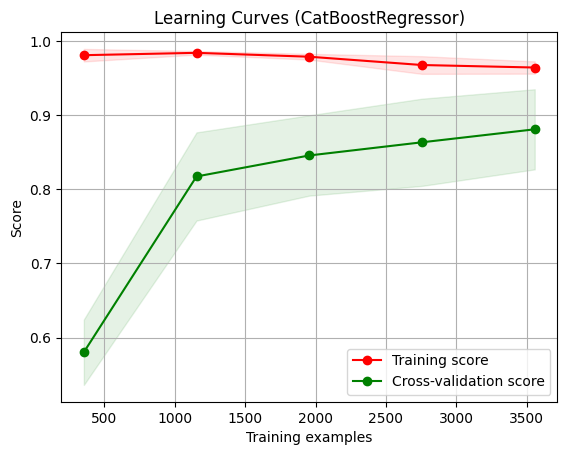

In [72]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Train the model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Calculate metrics
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = sqrt(mse_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)  # <-- computing the MAE


print("The mean squared error (MSE) on test set: {:.4f}".format(mse_catboost))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_catboost))
print("The R^2 score on the test set: {:.4f}".format(r2_catboost))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_catboost))  # <-- printing the MAE


# Plot learning curve
plot_learning_curve(catboost_model, "Learning Curves (CatBoostRegressor)", X, y, cv=5, n_jobs=4)
plt.show()

### Model evaluation plots

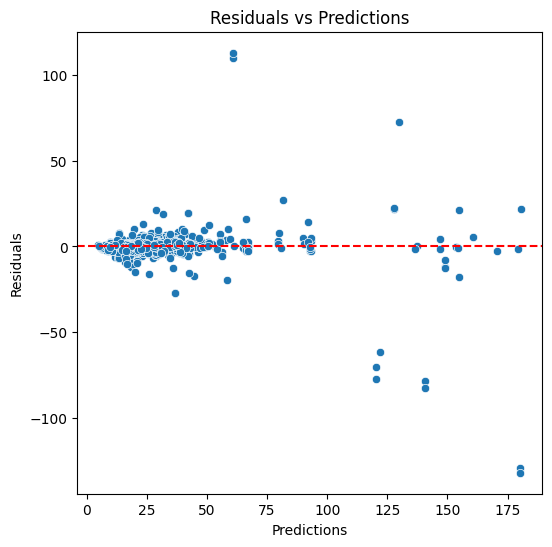

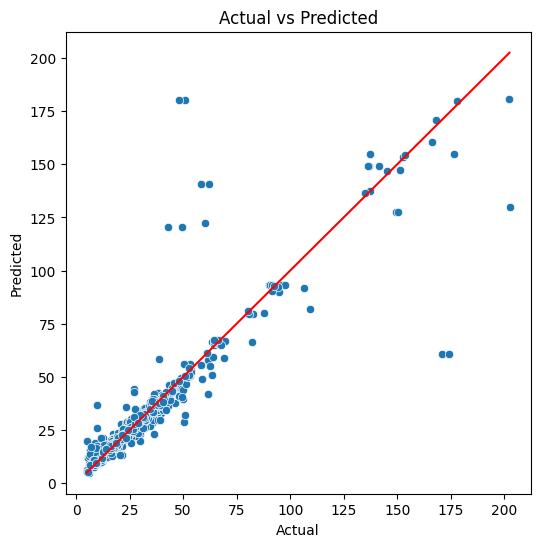

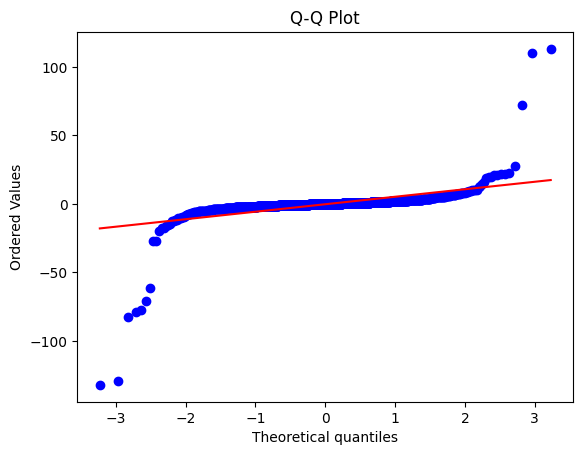

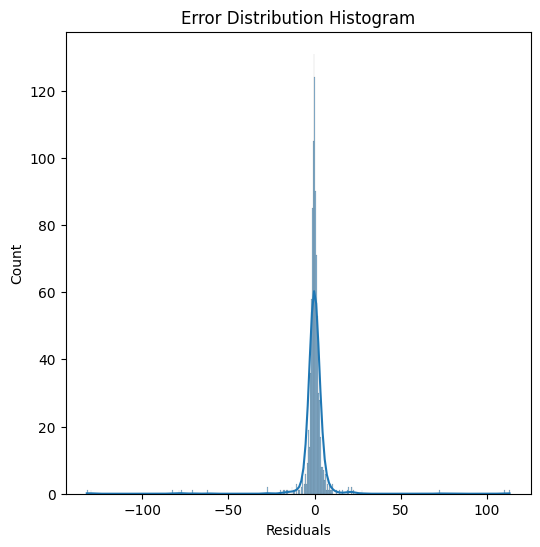

In [73]:
plot_model_evaluation(y_test, y_pred_catboost)

### Feature Importance

In [74]:
import catboost as cb
import plotly.express as px
import pandas as pd

# fit model
cb_model = cb.CatBoostRegressor()
cb_model.fit(X_train, y_train)

# get importance
importance = cb_model.get_feature_importance()

# create dataframe for visualization
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# assign color groups
def color_assignment(feature):
    if feature in ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter', 'Month_x', 'Month_y']:
        return 'General Features'
    elif feature in ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares', 'EV/EBITDA', 'P/E', 'Forward P/E']:
        return 'Financials'
    elif feature in ['sentiment_numerical', 'sentiment_score', 'esg_numerical', 'esg_classification_score', 'fls_numerical', 'fls_classification_score']:
        return 'Classifications'
    else:
        return 'Macroeconomic'

# assign color group to each feature
importance_df['Color_Group'] = importance_df['Features'].apply(color_assignment)

# plot
fig = px.bar(importance_df, x='Importance', y='Features', orientation='h', color='Color_Group',
             title='Feature Importance', labels={'Importance': 'Importance', 'Features': 'Features'},
             color_discrete_map={'General Features': 'blue', 'Financials': 'green', 'Classifications': 'red', 'Macroeconomic': 'yellow'})

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Learning rate set to 0.051827
0:	learn: 23.5075074	total: 22.8ms	remaining: 22.8s
1:	learn: 23.0244130	total: 31.6ms	remaining: 15.8s
2:	learn: 22.5330633	total: 38.7ms	remaining: 12.8s
3:	learn: 22.0988768	total: 47.9ms	remaining: 11.9s
4:	learn: 21.6969730	total: 58.3ms	remaining: 11.6s
5:	learn: 21.3116094	total: 65.1ms	remaining: 10.8s
6:	learn: 20.9564398	total: 71.8ms	remaining: 10.2s
7:	learn: 20.6242304	total: 78.6ms	remaining: 9.75s
8:	learn: 20.3302699	total: 85ms	remaining: 9.36s
9:	learn: 20.1100882	total: 89.5ms	remaining: 8.86s
10:	learn: 19.8404240	total: 96.2ms	remaining: 8.65s
11:	learn: 19.5734043	total: 103ms	remaining: 8.46s
12:	learn: 19.2975296	total: 112ms	remaining: 8.49s
13:	learn: 19.0471383	total: 121ms	remaining: 8.55s
14:	learn: 18.7364550	total: 132ms	remaining: 8.65s
15:	learn: 18.4790700	total: 147ms	remaining: 9.05s
16:	learn: 18.1311165	total: 155ms	remaining: 8.94s
17:	learn: 17.9043166	total: 162ms	remaining: 8.81s
18:	learn: 17.7577261	total: 170ms	

# Fine Tuning

In [75]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
lgbm_model = LGBMRegressor(objective ='regression')  # using regression as our objective function
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm))

The mean squared error (MSE) on test set: 71.2655
The root mean squared error (RMSE) on test set: 8.4419
The R^2 score on the test set: 0.8624


## Grid Search

In [76]:
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold

# Define parameter grid
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

# Create a base model
lgbm = LGBMRegressor()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
grid_search = HalvingGridSearchCV(estimator = lgbm, param_grid = param_grid,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 54
max_resources_: 4446
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 54
Fitting 5 folds for each of 120 candidates, totalling 600 fits
----------
iter: 1
n_candidates: 40
n_resources: 162
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 2
n_candidates: 14
n_resources: 486
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 3
n_candidates: 5
n_resources: 1458
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 4374
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will b

The mean squared error (MSE) on test set: 66.5692
The root mean squared error (RMSE) on test set: 8.1590
The R^2 score on the test set: 0.8715


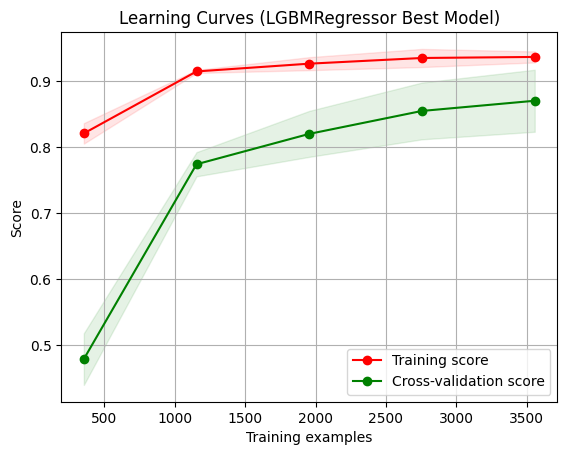

In [77]:
from lightgbm import LGBMRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

# Train the model using the best parameters
lgbm_best = LGBMRegressor(**best_params)
lgbm_best.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_lgbm_best = lgbm_best.predict(X_test)

# Calculate metrics
mse_lgbm_best = mean_squared_error(y_test, y_pred_lgbm_best)
rmse_lgbm_best = sqrt(mse_lgbm_best)
r2_lgbm_best = r2_score(y_test, y_pred_lgbm_best)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm_best))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm_best))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm_best))

# Plot learning curve
plot_learning_curve(lgbm_best, "Learning Curves (LGBMRegressor Best Model)", X, y, cv=5, n_jobs=4)
plt.show()


## halving grid search

In [78]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Define parameter grid
param_grid_focused = {
    'num_leaves': [30, 50, 70], # It will be good to experiment with this value around 50
    'min_data_in_leaf': [80, 100, 120], # As the HalvingGridSearchCV found a value of 100 to be optimal, we'll experiment around this value
    'lambda_l1': [0, 0.1, 0.2], # GridSearch found 0 to be optimal, but let's experiment around this value
    'lambda_l2': [0.8, 1, 1.2] # GridSearch found 1 to be optimal, but let's experiment around this value
}
# Create a base model
lgbm_model = lgb.LGBMRegressor()

# Manually create the splits in CV in order to be able to fix a random_state (HalvingGridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
halving_grid_search = HalvingGridSearchCV(estimator = lgbm_model, param_grid = param_grid_focused,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_focused = halving_grid_search.best_params_


n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 54
max_resources_: 4446
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 54
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 1
n_candidates: 27
n_resources: 162
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 9
n_resources: 486
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 1458
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 1
n_resources: 4374
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] lambda_l2 is set=1.2, reg_lambda=0.0 will be i

In [79]:
# Define parameter grid
param_grid_focused = {
    'num_leaves': [30, 50, 70],  # keeping this the same
    'min_data_in_leaf': [60, 70, 80],  # lowered the values
    'lambda_l1': [0, 0.1, 0.2],  # keeping this the same
    'lambda_l2': [0.6, 0.7, 0.8]  # lowered the values
}

# Manually create the splits in CV in order to be able to fix a random_state (HalvingGridSearchCV doesn't have that argument)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
halving_grid_search = HalvingGridSearchCV(estimator = lgbm_model, param_grid = param_grid_focused,
                           cv = cv, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
halving_grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_focused = halving_grid_search.best_params_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 54
max_resources_: 4446
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 81
n_resources: 54
Fitting 5 folds for each of 81 candidates, totalling 405 fits
----------
iter: 1
n_candidates: 27
n_resources: 162
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 2
n_candidates: 9
n_resources: 486
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 3
n_candidates: 3
n_resources: 1458
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 1
n_resources: 4374
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [80]:
print("Best Parameters: ", halving_grid_search.best_params_)
print("Best Score: ", halving_grid_search.best_score_)

Best Parameters:  {'lambda_l1': 0, 'lambda_l2': 0.6, 'min_data_in_leaf': 70, 'num_leaves': 30}
Best Score:  0.8424672912663255


## Automated Hyperparameter Tuning Libraries

In [81]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/225.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.7 MB/s eta 0:00:00


In [82]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    # Define the hyperparameters
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = LGBMRegressor(**params)
    model.fit(X_train_split, y_train_split, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)

    y_pred = model.predict(X_val)
    error = mean_squared_error(y_val, y_pred)

    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# Train the model with the best hyperparameters obtained
lgbm_model_optuna = LGBMRegressor(**study.best_trial.params)
lgbm_model_optuna.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm_optuna = lgbm_model_optuna.predict(X_test)

# Calculate metrics
mse_lgbm_optuna = mean_squared_error(y_test, y_pred_lgbm_optuna)
rmse_lgbm_optuna = sqrt(mse_lgbm_optuna)
r2_lgbm_optuna = r2_score(y_test, y_pred_lgbm_optuna)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm_optuna))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm_optuna))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm_optuna))


[I 2023-08-06 02:24:11,587] A new study created in memory with name: no-name-270c631c-4a9c-44bc-992a-1410b5ccd6d2
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:19: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github

[LightGBM] [Warning] lambda_l1 is set=0.009861332495572021, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009861332495572021
[LightGBM] [Warning] bagging_fraction is set=0.7734484244743443, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7734484244743443
[LightGBM] [Warning] lambda_l2 is set=0.003657282274107083, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003657282274107083
[LightGBM] [Warning] feature_fraction is set=0.7296622465156986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7296622465156986
[LightGBM] [Warning] min_data_in_leaf is set=47, min_child_samples=74 will be ignored. Current value: min_data_in_leaf=47
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-08-06 02:24:16,945] Trial 1 finished with value: 58.48297417491537 and parameters: {'num_leaves': 202, 'min_data_in_leaf': 47, 'max_depth': 22, 'learning_rate': 0.05969291972483521, 'n_estimators': 245, 'lambda_l1': 0.009861332495572021, 'lambda_l2': 0.003657282274107083, 'feature_fraction': 0.7296622465156986, 'bagging_fraction': 0.7734484244743443, 'bagging_freq': 1, 'min_child_samples': 74}. Best is trial 1 with value: 58.48297417491537.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_l

[LightGBM] [Warning] lambda_l1 is set=9.90375780161684e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.90375780161684e-06
[LightGBM] [Warning] bagging_fraction is set=0.41936123848082457, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41936123848082457
[LightGBM] [Warning] lambda_l2 is set=6.76024712117639e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.76024712117639e-07
[LightGBM] [Warning] feature_fraction is set=0.4789977105591771, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4789977105591771
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:24:19,234] Trial 2 finished with value: 57.07974535654275 and parameters: {'num_leaves': 205, 'min_data_in_leaf': 19, 'max_depth': 28, 'learning_rate': 0.13573116358181117, 'n_estimators': 89, 'lambda_l1': 9.90375780161684e-06, 'lambda_l2': 6.76024712117639e-07, 'feature_fraction': 0.4789977105591771, 'bagging_fraction': 0.41936123848082457, 'bagging_freq': 4, 'min_child_samples': 17}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_l

[LightGBM] [Warning] lambda_l1 is set=4.5994257773034845e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.5994257773034845e-07
[LightGBM] [Warning] bagging_fraction is set=0.846566546975811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.846566546975811
[LightGBM] [Warning] lambda_l2 is set=0.008978644272612404, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008978644272612404
[LightGBM] [Warning] feature_fraction is set=0.43312758782980904, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43312758782980904
[LightGBM] [Warning] min_data_in_leaf is set=46, min_child_samples=79 will be ignored. Current value: min_data_in_leaf=46
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-08-06 02:24:22,992] Trial 3 finished with value: 172.83509515449114 and parameters: {'num_leaves': 88, 'min_data_in_leaf': 46, 'max_depth': 30, 'learning_rate': 0.010634550167473248, 'n_estimators': 182, 'lambda_l1': 4.5994257773034845e-07, 'lambda_l2': 0.008978644272612404, 'feature_fraction': 0.43312758782980904, 'bagging_fraction': 0.846566546975811, 'bagging_freq': 7, 'min_child_samples': 79}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=5.568320855660628e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.568320855660628e-08
[LightGBM] [Warning] bagging_fraction is set=0.9556033041282855, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9556033041282855
[LightGBM] [Warning] lambda_l2 is set=3.881480888080071e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.881480888080071e-07
[LightGBM] [Warning] feature_fraction is set=0.6315159682288226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6315159682288226
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=57 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:24:31,056] Trial 4 finished with value: 141.29072817069513 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 32, 'max_depth': 21, 'learning_rate': 0.021563931931155716, 'n_estimators': 72, 'lambda_l1': 5.568320855660628e-08, 'lambda_l2': 3.881480888080071e-07, 'feature_fraction': 0.6315159682288226, 'bagging_fraction': 0.9556033041282855, 'bagging_freq': 2, 'min_child_samples': 57}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=7.409593438105784e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.409593438105784e-08
[LightGBM] [Warning] bagging_fraction is set=0.5411099965805507, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5411099965805507
[LightGBM] [Warning] lambda_l2 is set=3.305512808360692e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.305512808360692e-08
[LightGBM] [Warning] feature_fraction is set=0.6249955942795203, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6249955942795203
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:24:31,813] Trial 5 finished with value: 169.4188669213203 and parameters: {'num_leaves': 119, 'min_data_in_leaf': 95, 'max_depth': 29, 'learning_rate': 0.03998237139135195, 'n_estimators': 163, 'lambda_l1': 7.409593438105784e-08, 'lambda_l2': 3.305512808360692e-08, 'feature_fraction': 0.6249955942795203, 'bagging_fraction': 0.5411099965805507, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest

[LightGBM] [Warning] lambda_l1 is set=3.3790234767344443e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3790234767344443e-06
[LightGBM] [Warning] bagging_fraction is set=0.7579979767658407, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7579979767658407
[LightGBM] [Warning] lambda_l2 is set=4.894329093720023, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.894329093720023
[LightGBM] [Warning] feature_fraction is set=0.7789405115643779, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7789405115643779
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-08-06 02:24:33,827] Trial 6 finished with value: 275.1924180601154 and parameters: {'num_leaves': 15, 'min_data_in_leaf': 56, 'max_depth': 5, 'learning_rate': 0.01013917574629472, 'n_estimators': 225, 'lambda_l1': 3.3790234767344443e-06, 'lambda_l2': 4.894329093720023, 'feature_fraction': 0.7789405115643779, 'bagging_fraction': 0.7579979767658407, 'bagging_freq': 1, 'min_child_samples': 48}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_logu

[LightGBM] [Warning] lambda_l1 is set=2.382251940242124e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.382251940242124e-06
[LightGBM] [Warning] bagging_fraction is set=0.7158677468501555, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7158677468501555
[LightGBM] [Warning] lambda_l2 is set=0.28019189660031585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.28019189660031585
[LightGBM] [Warning] feature_fraction is set=0.6204479423329157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6204479423329157
[LightGBM] [Warning] min_data_in_leaf is set=61, min_child_samples=99 will be ignored. Current value: min_data_in_leaf=61
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-08-06 02:24:35,667] Trial 7 finished with value: 153.40663016093188 and parameters: {'num_leaves': 24, 'min_data_in_leaf': 61, 'max_depth': 12, 'learning_rate': 0.033762865525055454, 'n_estimators': 135, 'lambda_l1': 2.382251940242124e-06, 'lambda_l2': 0.28019189660031585, 'feature_fraction': 0.6204479423329157, 'bagging_fraction': 0.7158677468501555, 'bagging_freq': 7, 'min_child_samples': 99}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_

[LightGBM] [Warning] lambda_l1 is set=1.5917732666990291e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5917732666990291e-07
[LightGBM] [Warning] bagging_fraction is set=0.7778407541238035, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7778407541238035
[LightGBM] [Warning] lambda_l2 is set=0.0064386114470477785, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0064386114470477785
[LightGBM] [Warning] feature_fraction is set=0.8662221386378817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8662221386378817
[LightGBM] [Warning] min_data_in_leaf is set=85, min_child_samples=32 will be ignored. Current value: min_data_in_leaf=85
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2023-08-06 02:24:40,177] Trial 8 finished with value: 62.09639657258485 and parameters: {'num_leaves': 125, 'min_data_in_leaf': 85, 'max_depth': 15, 'learning_rate': 0.1555439258263173, 'n_estimators': 227, 'lambda_l1': 1.5917732666990291e-07, 'lambda_l2': 0.0064386114470477785, 'feature_fraction': 0.8662221386378817, 'bagging_fraction': 0.7778407541238035, 'bagging_freq': 1, 'min_child_samples': 32}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest

[LightGBM] [Warning] lambda_l1 is set=0.45325278695189386, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.45325278695189386
[LightGBM] [Warning] bagging_fraction is set=0.5250907765523369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5250907765523369
[LightGBM] [Warning] lambda_l2 is set=1.247340261251786e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.247340261251786e-07
[LightGBM] [Warning] feature_fraction is set=0.8660562970988055, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8660562970988055
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=85 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2023-08-06 02:24:48,451] Trial 9 finished with value: 67.94233807279471 and parameters: {'num_leaves': 146, 'min_data_in_leaf': 14, 'max_depth': 6, 'learning_rate': 0.05617256860247376, 'n_estimators': 180, 'lambda_l1': 0.45325278695189386, 'lambda_l2': 1.247340261251786e-07, 'feature_fraction': 0.8660562970988055, 'bagging_fraction': 0.5250907765523369, 'bagging_freq': 7, 'min_child_samples': 85}. Best is trial 2 with value: 57.07974535654275.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_lo

[LightGBM] [Warning] lambda_l1 is set=4.684604801117953e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.684604801117953e-05
[LightGBM] [Warning] bagging_fraction is set=0.6162005247864251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6162005247864251
[LightGBM] [Warning] lambda_l2 is set=1.5007112677141693e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5007112677141693e-05
[LightGBM] [Warning] feature_fraction is set=0.41487726143214515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41487726143214515
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:02,940] Trial 10 finished with value: 40.51066038569068 and parameters: {'num_leaves': 226, 'min_data_in_leaf': 11, 'max_depth': 25, 'learning_rate': 0.29607303509563593, 'n_estimators': 300, 'lambda_l1': 4.684604801117953e-05, 'lambda_l2': 1.5007112677141693e-05, 'feature_fraction': 0.41487726143214515, 'bagging_fraction': 0.6162005247864251, 'bagging_freq': 4, 'min_child_samples': 6}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=3.307699393285901e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.307699393285901e-05
[LightGBM] [Warning] bagging_fraction is set=0.5750904311106141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5750904311106141
[LightGBM] [Warning] lambda_l2 is set=1.226164322264555e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.226164322264555e-05
[LightGBM] [Warning] feature_fraction is set=0.40196362121087525, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40196362121087525
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:07,630] Trial 11 finished with value: 46.47590342202238 and parameters: {'num_leaves': 256, 'min_data_in_leaf': 13, 'max_depth': 25, 'learning_rate': 0.2969365078576939, 'n_estimators': 299, 'lambda_l1': 3.307699393285901e-05, 'lambda_l2': 1.226164322264555e-05, 'feature_fraction': 0.40196362121087525, 'bagging_fraction': 0.5750904311106141, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=7.135889697966997e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.135889697966997e-05
[LightGBM] [Warning] bagging_fraction is set=0.5866650077989386, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5866650077989386
[LightGBM] [Warning] lambda_l2 is set=2.9808425791425074e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9808425791425074e-05
[LightGBM] [Warning] feature_fraction is set=0.4269026031614513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4269026031614513
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=6 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:09,191] Trial 12 finished with value: 45.14343385113566 and parameters: {'num_leaves': 252, 'min_data_in_leaf': 16, 'max_depth': 24, 'learning_rate': 0.29547869808333915, 'n_estimators': 290, 'lambda_l1': 7.135889697966997e-05, 'lambda_l2': 2.9808425791425074e-05, 'feature_fraction': 0.4269026031614513, 'bagging_fraction': 0.5866650077989386, 'bagging_freq': 3, 'min_child_samples': 6}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=0.0002848578011482816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002848578011482816
[LightGBM] [Warning] bagging_fraction is set=0.6148372337241224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6148372337241224
[LightGBM] [Warning] lambda_l2 is set=6.091415605423148e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.091415605423148e-05
[LightGBM] [Warning] feature_fraction is set=0.5187055473139515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5187055473139515
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=27 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:13,843] Trial 13 finished with value: 41.23719221207798 and parameters: {'num_leaves': 252, 'min_data_in_leaf': 27, 'max_depth': 20, 'learning_rate': 0.27254540215660783, 'n_estimators': 296, 'lambda_l1': 0.0002848578011482816, 'lambda_l2': 6.091415605423148e-05, 'feature_fraction': 0.5187055473139515, 'bagging_fraction': 0.6148372337241224, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=0.002243685494628658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002243685494628658
[LightGBM] [Warning] bagging_fraction is set=0.6425560659763697, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6425560659763697
[LightGBM] [Warning] lambda_l2 is set=0.00010686170177266992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010686170177266992
[LightGBM] [Warning] feature_fraction is set=0.5173614725530675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5173614725530675
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=33 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:25:15,056] Trial 14 finished with value: 43.42390372228769 and parameters: {'num_leaves': 227, 'min_data_in_leaf': 30, 'max_depth': 18, 'learning_rate': 0.16191338660556004, 'n_estimators': 268, 'lambda_l1': 0.002243685494628658, 'lambda_l2': 0.00010686170177266992, 'feature_fraction': 0.5173614725530675, 'bagging_fraction': 0.6425560659763697, 'bagging_freq': 5, 'min_child_samples': 33}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=0.00010453621108918311, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010453621108918311
[LightGBM] [Warning] bagging_fraction is set=0.6658539848544872, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6658539848544872
[LightGBM] [Warning] lambda_l2 is set=5.3444545441345974e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3444545441345974e-06
[LightGBM] [Warning] feature_fraction is set=0.530910479165306, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.530910479165306
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=33 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:16,427] Trial 15 finished with value: 40.85262306749833 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 25, 'max_depth': 19, 'learning_rate': 0.20363456652982312, 'n_estimators': 254, 'lambda_l1': 0.00010453621108918311, 'lambda_l2': 5.3444545441345974e-06, 'feature_fraction': 0.530910479165306, 'bagging_fraction': 0.6658539848544872, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=0.016488173345641323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016488173345641323
[LightGBM] [Warning] bagging_fraction is set=0.6793199778616811, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6793199778616811
[LightGBM] [Warning] lambda_l2 is set=6.891685361240354e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.891685361240354e-06
[LightGBM] [Warning] feature_fraction is set=0.5517157766557091, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5517157766557091
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:25:17,178] Trial 16 finished with value: 61.02653523928681 and parameters: {'num_leaves': 169, 'min_data_in_leaf': 71, 'max_depth': 16, 'learning_rate': 0.1033802948256184, 'n_estimators': 253, 'lambda_l1': 0.016488173345641323, 'lambda_l2': 6.891685361240354e-06, 'feature_fraction': 0.5517157766557091, 'bagging_fraction': 0.6793199778616811, 'bagging_freq': 5, 'min_child_samples': 48}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest

[LightGBM] [Warning] lambda_l1 is set=0.00011722462769567509, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011722462769567509
[LightGBM] [Warning] bagging_fraction is set=0.6697791240968861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6697791240968861
[LightGBM] [Warning] lambda_l2 is set=1.907220797634319e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.907220797634319e-06
[LightGBM] [Warning] feature_fraction is set=0.47721783039450916, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47721783039450916
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=59 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:17,969] Trial 17 finished with value: 50.562292093601855 and parameters: {'num_leaves': 164, 'min_data_in_leaf': 42, 'max_depth': 25, 'learning_rate': 0.19727832960804442, 'n_estimators': 208, 'lambda_l1': 0.00011722462769567509, 'lambda_l2': 1.907220797634319e-06, 'feature_fraction': 0.47721783039450916, 'bagging_fraction': 0.6697791240968861, 'bagging_freq': 3, 'min_child_samples': 59}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

su

[LightGBM] [Warning] lambda_l1 is set=1.4628989042235683e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4628989042235683e-06
[LightGBM] [Warning] bagging_fraction is set=0.5008888458240375, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5008888458240375
[LightGBM] [Warning] lambda_l2 is set=0.0005459505390692718, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005459505390692718
[LightGBM] [Warning] feature_fraction is set=0.5714210626902985, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5714210626902985
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-08-06 02:25:19,351] Trial 18 finished with value: 48.1670555845229 and parameters: {'num_leaves': 95, 'min_data_in_leaf': 20, 'max_depth': 18, 'learning_rate': 0.09868915342141162, 'n_estimators': 267, 'lambda_l1': 1.4628989042235683e-06, 'lambda_l2': 0.0005459505390692718, 'feature_fraction': 0.5714210626902985, 'bagging_fraction': 0.5008888458240375, 'bagging_freq': 6, 'min_child_samples': 20}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=1.3300013814070544e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3300013814070544e-05
[LightGBM] [Warning] bagging_fraction is set=0.6312936924270776, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6312936924270776
[LightGBM] [Warning] lambda_l2 is set=2.502557736471908e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.502557736471908e-08
[LightGBM] [Warning] feature_fraction is set=0.43908443457438673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43908443457438673
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=38 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:25:20,639] Trial 19 finished with value: 43.28118581621474 and parameters: {'num_leaves': 224, 'min_data_in_leaf': 10, 'max_depth': 26, 'learning_rate': 0.09919515119739944, 'n_estimators': 117, 'lambda_l1': 1.3300013814070544e-05, 'lambda_l2': 2.502557736471908e-08, 'feature_fraction': 0.43908443457438673, 'bagging_fraction': 0.6312936924270776, 'bagging_freq': 2, 'min_child_samples': 38}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sug

[LightGBM] [Warning] lambda_l1 is set=1.2375401142394264e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2375401142394264e-08
[LightGBM] [Warning] bagging_fraction is set=0.7066623231353628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7066623231353628
[LightGBM] [Warning] lambda_l2 is set=4.188122891472565e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.188122891472565e-06
[LightGBM] [Warning] feature_fraction is set=0.48787505049439006, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48787505049439006
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=41 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:25:21,220] Trial 20 finished with value: 58.717016379166644 and parameters: {'num_leaves': 53, 'min_data_in_leaf': 70, 'max_depth': 13, 'learning_rate': 0.21582249797022404, 'n_estimators': 201, 'lambda_l1': 1.2375401142394264e-08, 'lambda_l2': 4.188122891472565e-06, 'feature_fraction': 0.48787505049439006, 'bagging_fraction': 0.7066623231353628, 'bagging_freq': 2, 'min_child_samples': 41}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sug

[LightGBM] [Warning] lambda_l1 is set=0.0002965448607703953, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002965448607703953
[LightGBM] [Warning] bagging_fraction is set=0.6141244756766346, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6141244756766346
[LightGBM] [Warning] lambda_l2 is set=7.745326181634458e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.745326181634458e-05
[LightGBM] [Warning] feature_fraction is set=0.5425274772415377, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5425274772415377
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:22,749] Trial 21 finished with value: 41.97391640497629 and parameters: {'num_leaves': 234, 'min_data_in_leaf': 25, 'max_depth': 21, 'learning_rate': 0.2394063741714604, 'n_estimators': 294, 'lambda_l1': 0.0002965448607703953, 'lambda_l2': 7.745326181634458e-05, 'feature_fraction': 0.5425274772415377, 'bagging_fraction': 0.6141244756766346, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=0.0008816251964348066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008816251964348066
[LightGBM] [Warning] bagging_fraction is set=0.6017838231470574, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6017838231470574
[LightGBM] [Warning] lambda_l2 is set=0.00036065244923560313, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036065244923560313
[LightGBM] [Warning] feature_fraction is set=0.4035931308817519, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4035931308817519
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=27 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:26,404] Trial 22 finished with value: 49.641115682330245 and parameters: {'num_leaves': 177, 'min_data_in_leaf': 36, 'max_depth': 20, 'learning_rate': 0.2963904009159203, 'n_estimators': 269, 'lambda_l1': 0.0008816251964348066, 'lambda_l2': 0.00036065244923560313, 'feature_fraction': 0.4035931308817519, 'bagging_fraction': 0.6017838231470574, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=3.9008599926105575e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9008599926105575e-05
[LightGBM] [Warning] bagging_fraction is set=0.6489924759849995, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6489924759849995
[LightGBM] [Warning] lambda_l2 is set=1.3059735375757484e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3059735375757484e-05
[LightGBM] [Warning] feature_fraction is set=0.5025452948153497, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5025452948153497
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=12 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:28,495] Trial 23 finished with value: 43.11749234295328 and parameters: {'num_leaves': 228, 'min_data_in_leaf': 26, 'max_depth': 23, 'learning_rate': 0.19117267199812552, 'n_estimators': 276, 'lambda_l1': 3.9008599926105575e-05, 'lambda_l2': 1.3059735375757484e-05, 'feature_fraction': 0.5025452948153497, 'bagging_fraction': 0.6489924759849995, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sug

[LightGBM] [Warning] lambda_l1 is set=0.00022733878342070233, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022733878342070233
[LightGBM] [Warning] bagging_fraction is set=0.5488841734257898, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5488841734257898
[LightGBM] [Warning] lambda_l2 is set=1.3435137688220316e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3435137688220316e-06
[LightGBM] [Warning] feature_fraction is set=0.5864180134820633, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5864180134820633
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=26 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:29,724] Trial 24 finished with value: 45.801091589792726 and parameters: {'num_leaves': 208, 'min_data_in_leaf': 25, 'max_depth': 19, 'learning_rate': 0.2289826969558075, 'n_estimators': 242, 'lambda_l1': 0.00022733878342070233, 'lambda_l2': 1.3435137688220316e-06, 'feature_fraction': 0.5864180134820633, 'bagging_fraction': 0.5488841734257898, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sug

[LightGBM] [Warning] lambda_l1 is set=1.1650233420092501e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1650233420092501e-05
[LightGBM] [Warning] bagging_fraction is set=0.48117705451475556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.48117705451475556
[LightGBM] [Warning] lambda_l2 is set=4.8223325316191156e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8223325316191156e-05
[LightGBM] [Warning] feature_fraction is set=0.4632868495019796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4632868495019796
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:25:30,580] Trial 25 finished with value: 59.17332571383838 and parameters: {'num_leaves': 256, 'min_data_in_leaf': 43, 'max_depth': 27, 'learning_rate': 0.14242405527741872, 'n_estimators': 298, 'lambda_l1': 1.1650233420092501e-05, 'lambda_l2': 4.8223325316191156e-05, 'feature_fraction': 0.4632868495019796, 'bagging_fraction': 0.48117705451475556, 'bagging_freq': 2, 'min_child_samples': 10}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

su

[LightGBM] [Warning] lambda_l1 is set=0.0026399295789661876, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0026399295789661876
[LightGBM] [Warning] bagging_fraction is set=0.5698811549504373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5698811549504373
[LightGBM] [Warning] lambda_l2 is set=0.00031304652536564203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00031304652536564203
[LightGBM] [Warning] feature_fraction is set=0.5286277650593868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5286277650593868
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=41 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:25:31,778] Trial 26 finished with value: 41.79433251314895 and parameters: {'num_leaves': 154, 'min_data_in_leaf': 21, 'max_depth': 15, 'learning_rate': 0.22474751053841824, 'n_estimators': 232, 'lambda_l1': 0.0026399295789661876, 'lambda_l2': 0.00031304652536564203, 'feature_fraction': 0.5286277650593868, 'bagging_fraction': 0.5698811549504373, 'bagging_freq': 5, 'min_child_samples': 41}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=7.793178278083799e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.793178278083799e-05
[LightGBM] [Warning] bagging_fraction is set=0.6147720084480687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6147720084480687
[LightGBM] [Warning] lambda_l2 is set=3.1506751295276643e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1506751295276643e-06
[LightGBM] [Warning] feature_fraction is set=0.4511067074985261, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4511067074985261
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:34,097] Trial 27 finished with value: 40.54136818285229 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 10, 'max_depth': 23, 'learning_rate': 0.12330971734842694, 'n_estimators': 263, 'lambda_l1': 7.793178278083799e-05, 'lambda_l2': 3.1506751295276643e-06, 'feature_fraction': 0.4511067074985261, 'bagging_fraction': 0.6147720084480687, 'bagging_freq': 4, 'min_child_samples': 22}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=8.396659714305616e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.396659714305616e-05
[LightGBM] [Warning] bagging_fraction is set=0.681372218944705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.681372218944705
[LightGBM] [Warning] lambda_l2 is set=3.0774135605367195e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0774135605367195e-06
[LightGBM] [Warning] feature_fraction is set=0.4590883488887445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4590883488887445
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=17 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2023-08-06 02:25:35,694] Trial 28 finished with value: 48.013475437277634 and parameters: {'num_leaves': 184, 'min_data_in_leaf': 11, 'max_depth': 23, 'learning_rate': 0.17864990599567926, 'n_estimators': 209, 'lambda_l1': 8.396659714305616e-05, 'lambda_l2': 3.0774135605367195e-06, 'feature_fraction': 0.4590883488887445, 'bagging_fraction': 0.681372218944705, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=5.9745470150675866e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.9745470150675866e-06
[LightGBM] [Warning] bagging_fraction is set=0.6340796672751994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6340796672751994
[LightGBM] [Warning] lambda_l2 is set=2.0496831466660608e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0496831466660608e-07
[LightGBM] [Warning] feature_fraction is set=0.4001647902187616, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4001647902187616
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=66 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:35,999] Trial 29 finished with value: 89.21269282817788 and parameters: {'num_leaves': 147, 'min_data_in_leaf': 37, 'max_depth': 27, 'learning_rate': 0.10913580545172819, 'n_estimators': 57, 'lambda_l1': 5.9745470150675866e-06, 'lambda_l2': 2.0496831466660608e-07, 'feature_fraction': 0.4001647902187616, 'bagging_fraction': 0.6340796672751994, 'bagging_freq': 4, 'min_child_samples': 66}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=2.970612454177898e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.970612454177898e-05
[LightGBM] [Warning] bagging_fraction is set=0.7228684340237126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7228684340237126
[LightGBM] [Warning] lambda_l2 is set=9.927916234981795e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.927916234981795e-07
[LightGBM] [Warning] feature_fraction is set=0.4729802835596737, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4729802835596737
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=21 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:19: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

<ipython-input-82-c6e2aa86cf2b>:20: FutureWarn

[LightGBM] [Warning] lambda_l1 is set=0.00031391812810521247, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00031391812810521247
[LightGBM] [Warning] bagging_fraction is set=0.6043571878960217, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6043571878960217
[LightGBM] [Warning] lambda_l2 is set=2.181635288585363e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.181635288585363e-05
[LightGBM] [Warning] feature_fraction is set=0.5022586320187526, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5022586320187526
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=34 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:39,064] Trial 31 finished with value: 44.337815013692776 and parameters: {'num_leaves': 241, 'min_data_in_leaf': 29, 'max_depth': 20, 'learning_rate': 0.1795800677105595, 'n_estimators': 278, 'lambda_l1': 0.00031391812810521247, 'lambda_l2': 2.181635288585363e-05, 'feature_fraction': 0.5022586320187526, 'bagging_fraction': 0.6043571878960217, 'bagging_freq': 4, 'min_child_samples': 34}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=0.000713800721929365, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000713800721929365
[LightGBM] [Warning] bagging_fraction is set=0.6512161718516926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6512161718516926
[LightGBM] [Warning] lambda_l2 is set=5.175144590054055e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.175144590054055e-06
[LightGBM] [Warning] feature_fraction is set=0.5213156386565276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5213156386565276
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=11 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:42,245] Trial 32 finished with value: 43.16507329967716 and parameters: {'num_leaves': 215, 'min_data_in_leaf': 21, 'max_depth': 22, 'learning_rate': 0.25685203798634504, 'n_estimators': 253, 'lambda_l1': 0.000713800721929365, 'lambda_l2': 5.175144590054055e-06, 'feature_fraction': 0.5213156386565276, 'bagging_fraction': 0.6512161718516926, 'bagging_freq': 3, 'min_child_samples': 11}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=0.00010653528707109656, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010653528707109656
[LightGBM] [Warning] bagging_fraction is set=0.5942931744670293, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5942931744670293
[LightGBM] [Warning] lambda_l2 is set=0.00012232136151872711, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012232136151872711
[LightGBM] [Warning] feature_fraction is set=0.44613859675188877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44613859675188877
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=29 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:43,503] Trial 33 finished with value: 41.71510652579171 and parameters: {'num_leaves': 204, 'min_data_in_leaf': 19, 'max_depth': 16, 'learning_rate': 0.24007326132341342, 'n_estimators': 258, 'lambda_l1': 0.00010653528707109656, 'lambda_l2': 0.00012232136151872711, 'feature_fraction': 0.44613859675188877, 'bagging_fraction': 0.5942931744670293, 'bagging_freq': 4, 'min_child_samples': 29}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

su

[LightGBM] [Warning] lambda_l1 is set=1.7055980061554456e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7055980061554456e-05
[LightGBM] [Warning] bagging_fraction is set=0.5651529802573004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5651529802573004
[LightGBM] [Warning] lambda_l2 is set=1.6243864947226567e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6243864947226567e-05
[LightGBM] [Warning] feature_fraction is set=0.5785429311484185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5785429311484185
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=22 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:44,530] Trial 34 finished with value: 63.469782637405125 and parameters: {'num_leaves': 215, 'min_data_in_leaf': 38, 'max_depth': 23, 'learning_rate': 0.07460674349637617, 'n_estimators': 280, 'lambda_l1': 1.7055980061554456e-05, 'lambda_l2': 1.6243864947226567e-05, 'feature_fraction': 0.5785429311484185, 'bagging_fraction': 0.5651529802573004, 'bagging_freq': 4, 'min_child_samples': 22}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

su

[LightGBM] [Warning] lambda_l1 is set=1.0635698796938254e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0635698796938254e-06
[LightGBM] [Warning] bagging_fraction is set=0.6150024024194224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6150024024194224
[LightGBM] [Warning] lambda_l2 is set=9.89664750931459e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.89664750931459e-07
[LightGBM] [Warning] feature_fraction is set=0.43657892745805527, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43657892745805527
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=14 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:45,245] Trial 35 finished with value: 55.8105971422861 and parameters: {'num_leaves': 191, 'min_data_in_leaf': 52, 'max_depth': 21, 'learning_rate': 0.15118056042739358, 'n_estimators': 237, 'lambda_l1': 1.0635698796938254e-06, 'lambda_l2': 9.89664750931459e-07, 'feature_fraction': 0.43657892745805527, 'bagging_fraction': 0.6150024024194224, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=5.325548307567227e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.325548307567227e-06
[LightGBM] [Warning] bagging_fraction is set=0.45625666190586633, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45625666190586633
[LightGBM] [Warning] lambda_l2 is set=0.0011938650755629102, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011938650755629102
[LightGBM] [Warning] feature_fraction is set=0.4872876731186948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4872876731186948
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=46 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:25:46,345] Trial 36 finished with value: 47.58372595002036 and parameters: {'num_leaves': 242, 'min_data_in_leaf': 17, 'max_depth': 29, 'learning_rate': 0.18611017637022897, 'n_estimators': 283, 'lambda_l1': 5.325548307567227e-06, 'lambda_l2': 0.0011938650755629102, 'feature_fraction': 0.4872876731186948, 'bagging_fraction': 0.45625666190586633, 'bagging_freq': 2, 'min_child_samples': 46}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=0.010171416068253239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010171416068253239
[LightGBM] [Warning] bagging_fraction is set=0.5357089243783952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5357089243783952
[LightGBM] [Warning] lambda_l2 is set=5.809403253347929e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.809403253347929e-07
[LightGBM] [Warning] feature_fraction is set=0.6696531589479192, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6696531589479192
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=5 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:25:47,528] Trial 37 finished with value: 52.50699609707654 and parameters: {'num_leaves': 174, 'min_data_in_leaf': 31, 'max_depth': 19, 'learning_rate': 0.1281562255606474, 'n_estimators': 257, 'lambda_l1': 0.010171416068253239, 'lambda_l2': 5.809403253347929e-07, 'feature_fraction': 0.6696531589479192, 'bagging_fraction': 0.5357089243783952, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest_

[LightGBM] [Warning] lambda_l1 is set=3.111505461857293e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.111505461857293e-05
[LightGBM] [Warning] bagging_fraction is set=0.41750557433669355, subsample=1.0 will be ignored. Current value: bagging_fraction=0.41750557433669355
[LightGBM] [Warning] lambda_l2 is set=4.130087759614477e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130087759614477e-05
[LightGBM] [Warning] feature_fraction is set=0.5434401653317079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5434401653317079
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=36 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:48,343] Trial 38 finished with value: 47.825715001866506 and parameters: {'num_leaves': 115, 'min_data_in_leaf': 25, 'max_depth': 25, 'learning_rate': 0.2561606766247488, 'n_estimators': 194, 'lambda_l1': 3.111505461857293e-05, 'lambda_l2': 4.130087759614477e-05, 'feature_fraction': 0.5434401653317079, 'bagging_fraction': 0.41750557433669355, 'bagging_freq': 3, 'min_child_samples': 36}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=7.674477554568384e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.674477554568384e-07
[LightGBM] [Warning] bagging_fraction is set=0.7325781750714797, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7325781750714797
[LightGBM] [Warning] lambda_l2 is set=3.1471126786511315e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1471126786511315e-06
[LightGBM] [Warning] feature_fraction is set=0.5042624444533925, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5042624444533925
[LightGBM] [Warning] min_data_in_leaf is set=49, min_child_samples=19 will be ignored. Current value: min_data_in_leaf=49
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:48,993] Trial 39 finished with value: 51.86017731022998 and parameters: {'num_leaves': 140, 'min_data_in_leaf': 49, 'max_depth': 17, 'learning_rate': 0.20252996177327556, 'n_estimators': 155, 'lambda_l1': 7.674477554568384e-07, 'lambda_l2': 3.1471126786511315e-06, 'feature_fraction': 0.5042624444533925, 'bagging_fraction': 0.7325781750714797, 'bagging_freq': 4, 'min_child_samples': 19}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=4.282518952309994e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.282518952309994e-06
[LightGBM] [Warning] bagging_fraction is set=0.6720916803631168, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6720916803631168
[LightGBM] [Warning] lambda_l2 is set=9.775839393253314e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.775839393253314e-08
[LightGBM] [Warning] feature_fraction is set=0.6130615025705675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6130615025705675
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=54 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2023-08-06 02:25:50,394] Trial 40 finished with value: 42.69445434036282 and parameters: {'num_leaves': 200, 'min_data_in_leaf': 17, 'max_depth': 14, 'learning_rate': 0.16006295437531737, 'n_estimators': 225, 'lambda_l1': 4.282518952309994e-06, 'lambda_l2': 9.775839393253314e-08, 'feature_fraction': 0.6130615025705675, 'bagging_fraction': 0.6720916803631168, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=0.00012397474587819135, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012397474587819135
[LightGBM] [Warning] bagging_fraction is set=0.58690633351879, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58690633351879
[LightGBM] [Warning] lambda_l2 is set=0.00011711308836595429, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011711308836595429
[LightGBM] [Warning] feature_fraction is set=0.43292069510087977, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43292069510087977
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:55,264] Trial 41 finished with value: 45.93640433472102 and parameters: {'num_leaves': 216, 'min_data_in_leaf': 18, 'max_depth': 17, 'learning_rate': 0.24879625669930744, 'n_estimators': 256, 'lambda_l1': 0.00012397474587819135, 'lambda_l2': 0.00011711308836595429, 'feature_fraction': 0.43292069510087977, 'bagging_fraction': 0.58690633351879, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=0.0001241644278202791, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001241644278202791
[LightGBM] [Warning] bagging_fraction is set=0.616596543391717, subsample=1.0 will be ignored. Current value: bagging_fraction=0.616596543391717
[LightGBM] [Warning] lambda_l2 is set=9.793661405516016e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.793661405516016e-06
[LightGBM] [Warning] feature_fraction is set=0.4564702388743271, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4564702388743271
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=29 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:56,321] Trial 42 finished with value: 40.65441860951254 and parameters: {'num_leaves': 201, 'min_data_in_leaf': 13, 'max_depth': 11, 'learning_rate': 0.25404683832864033, 'n_estimators': 264, 'lambda_l1': 0.0001241644278202791, 'lambda_l2': 9.793661405516016e-06, 'feature_fraction': 0.4564702388743271, 'bagging_fraction': 0.616596543391717, 'bagging_freq': 4, 'min_child_samples': 29}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=0.0003957304650927698, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003957304650927698
[LightGBM] [Warning] bagging_fraction is set=0.6910226236428472, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6910226236428472
[LightGBM] [Warning] lambda_l2 is set=1.8997410665174858e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8997410665174858e-05
[LightGBM] [Warning] feature_fraction is set=0.4709669798740987, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4709669798740987
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=24 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:25:57,320] Trial 43 finished with value: 45.151531156516874 and parameters: {'num_leaves': 158, 'min_data_in_leaf': 10, 'max_depth': 9, 'learning_rate': 0.2943452231307604, 'n_estimators': 300, 'lambda_l1': 0.0003957304650927698, 'lambda_l2': 1.8997410665174858e-05, 'feature_fraction': 0.4709669798740987, 'bagging_fraction': 0.6910226236428472, 'bagging_freq': 5, 'min_child_samples': 24}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=6.143874881682021e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.143874881682021e-05
[LightGBM] [Warning] bagging_fraction is set=0.6264453234123764, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6264453234123764
[LightGBM] [Warning] lambda_l2 is set=7.5416858665563155e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.5416858665563155e-06
[LightGBM] [Warning] feature_fraction is set=0.4222597536387287, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4222597536387287
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=44 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2023-08-06 02:25:58,326] Trial 44 finished with value: 45.992490974483 and parameters: {'num_leaves': 243, 'min_data_in_leaf': 14, 'max_depth': 11, 'learning_rate': 0.2075022231645587, 'n_estimators': 285, 'lambda_l1': 6.143874881682021e-05, 'lambda_l2': 7.5416858665563155e-06, 'feature_fraction': 0.4222597536387287, 'bagging_fraction': 0.6264453234123764, 'bagging_freq': 3, 'min_child_samples': 44}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

suggest

[LightGBM] [Warning] lambda_l1 is set=0.001507105833485865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001507105833485865
[LightGBM] [Warning] bagging_fraction is set=0.5587697897097144, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5587697897097144
[LightGBM] [Warning] lambda_l2 is set=3.391404538865504e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.391404538865504e-07
[LightGBM] [Warning] feature_fraction is set=0.4476980321427465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4476980321427465
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2023-08-06 02:25:59,494] Trial 45 finished with value: 43.52088896040543 and parameters: {'num_leaves': 193, 'min_data_in_leaf': 22, 'max_depth': 22, 'learning_rate': 0.16635450323067666, 'n_estimators': 246, 'lambda_l1': 0.001507105833485865, 'lambda_l2': 3.391404538865504e-07, 'feature_fraction': 0.4476980321427465, 'bagging_fraction': 0.5587697897097144, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=0.00018419796431221053, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018419796431221053
[LightGBM] [Warning] bagging_fraction is set=0.6521622866665556, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6521622866665556
[LightGBM] [Warning] lambda_l2 is set=2.000917771830861e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.000917771830861e-06
[LightGBM] [Warning] feature_fraction is set=0.5096913913302797, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5096913913302797
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:26:00,239] Trial 46 finished with value: 40.85061160009874 and parameters: {'num_leaves': 185, 'min_data_in_leaf': 15, 'max_depth': 9, 'learning_rate': 0.2708224412298616, 'n_estimators': 214, 'lambda_l1': 0.00018419796431221053, 'lambda_l2': 2.000917771830861e-06, 'feature_fraction': 0.5096913913302797, 'bagging_fraction': 0.6521622866665556, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugges

[LightGBM] [Warning] lambda_l1 is set=1.5668422377586194e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5668422377586194e-05
[LightGBM] [Warning] bagging_fraction is set=0.52165724396702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.52165724396702
[LightGBM] [Warning] lambda_l2 is set=1.8712753654754723e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8712753654754723e-06
[LightGBM] [Warning] feature_fraction is set=0.48794310645516414, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48794310645516414
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=16 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:26:00,863] Trial 47 finished with value: 41.816434783484716 and parameters: {'num_leaves': 132, 'min_data_in_leaf': 15, 'max_depth': 9, 'learning_rate': 0.21972677658338222, 'n_estimators': 172, 'lambda_l1': 1.5668422377586194e-05, 'lambda_l2': 1.8712753654754723e-06, 'feature_fraction': 0.48794310645516414, 'bagging_fraction': 0.52165724396702, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugg

[LightGBM] [Warning] lambda_l1 is set=0.00015554883958639564, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015554883958639564
[LightGBM] [Warning] bagging_fraction is set=0.7695985695509537, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7695985695509537
[LightGBM] [Warning] lambda_l2 is set=4.0684148079798045e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0684148079798045e-07
[LightGBM] [Warning] feature_fraction is set=0.5566805871523829, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5566805871523829
[LightGBM] [Warning] min_data_in_leaf is set=89, min_child_samples=8 will be ignored. Current value: min_data_in_leaf=89
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:26:01,366] Trial 48 finished with value: 60.38542508393594 and parameters: {'num_leaves': 180, 'min_data_in_leaf': 89, 'max_depth': 6, 'learning_rate': 0.25469188093950523, 'n_estimators': 215, 'lambda_l1': 0.00015554883958639564, 'lambda_l2': 4.0684148079798045e-07, 'feature_fraction': 0.5566805871523829, 'bagging_fraction': 0.7695985695509537, 'bagging_freq': 5, 'min_child_samples': 8}. Best is trial 10 with value: 40.51066038569068.
<ipython-input-82-c6e2aa86cf2b>:15: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:17: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

<ipython-input-82-c6e2aa86cf2b>:18: FutureWarning:

sugge

[LightGBM] [Warning] lambda_l1 is set=5.402011397628452e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.402011397628452e-05
[LightGBM] [Warning] bagging_fraction is set=0.6585046218714389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6585046218714389
[LightGBM] [Warning] lambda_l2 is set=9.198138587922382e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.198138587922382e-06
[LightGBM] [Warning] feature_fraction is set=0.4156441980272422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4156441980272422
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=15 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2023-08-06 02:26:02,030] Trial 49 finished with value: 47.94490156763338 and parameters: {'num_leaves': 166, 'min_data_in_leaf': 34, 'max_depth': 10, 'learning_rate': 0.29376271205664006, 'n_estimators': 220, 'lambda_l1': 5.402011397628452e-05, 'lambda_l2': 9.198138587922382e-06, 'feature_fraction': 0.4156441980272422, 'bagging_fraction': 0.6585046218714389, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 10 with value: 40.51066038569068.


Number of finished trials: 50
Best trial: {'num_leaves': 226, 'min_data_in_leaf': 11, 'max_depth': 25, 'learning_rate': 0.29607303509563593, 'n_estimators': 300, 'lambda_l1': 4.684604801117953e-05, 'lambda_l2': 1.5007112677141693e-05, 'feature_fraction': 0.41487726143214515, 'bagging_fraction': 0.6162005247864251, 'bagging_freq': 4, 'min_child_samples': 6}
[LightGBM] [Warning] lambda_l1 is set=4.684604801117953e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.684604801117953e-05
[LightGBM] [Warning] bagging_fraction is set=0.6162005247864251, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6162005247864251
[LightGBM] [Warning] lambda_l2 is set=1.5007112677141693e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5007112677141693e-05
[LightGBM] [Warning] feature_fraction is set=0.41487726143214515, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41487726143214515
[LightGBM] [Warning] min_data_in_leaf is set=11, min_chil

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Define the parameter space
param_dist = {'num_leaves': sp_randint(30, 60),  # narrower range
              'min_data_in_leaf': sp_randint(30, 100),  # narrower range
              'min_child_samples': sp_randint(20, 100),  # narrower range
              'learning_rate': sp_uniform(0.01, 0.1)}  # narrower range

# Use halving random search
rsh = HalvingRandomSearchCV(lgbm_model, param_dist,
                            resource='n_estimators', max_resources=300, cv=5)
rsh.fit(X_train, y_train)

# Train a new model with the best parameters
lgbm_model_halving = LGBMRegressor(**rsh.best_params_)
lgbm_model_halving.fit(X_train, y_train)

# Make predictions on the test set
y_pred_halving = lgbm_model_halving.predict(X_test)

# Calculate metrics
mse_halving = mean_squared_error(y_test, y_pred_halving)
rmse_halving = sqrt(mse_halving)
mae_halving = mean_absolute_error(y_test, y_pred_halving)
r2_halving = r2_score(y_test, y_pred_halving)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_halving))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_halving))
print("The mean absolute error (MAE) on test set: {:.4f}".format(mae_halving))
print("The R^2 score on the test set: {:.4f}".format(r2_halving))

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=75 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=75 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=75 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=75 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=75 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=83 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=83 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=83 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min

In [85]:
# Print the best parameters
print("Best parameters found by Halving Random Search: ", rsh.best_params_)

Best parameters found by Halving Random Search:  {'learning_rate': 0.10566193678947015, 'min_child_samples': 24, 'min_data_in_leaf': 34, 'num_leaves': 42, 'n_estimators': 243}


In [86]:
!pip install hyperopt

In [87]:
from hyperopt import hp, tpe, fmin
from sklearn.metrics import mean_squared_error

# Define the objective function
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'min_data_in_leaf': int(params['min_data_in_leaf']),
        'learning_rate': float(params['learning_rate']),
        'min_child_samples': int(params['min_child_samples']),
    }

    lgbm_model = LGBMRegressor(**params, random_state=42)
    lgbm_model.fit(X_train, y_train)
    preds = lgbm_model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    return mse

# Define the hyperparameter space
space = {
    'num_leaves': hp.quniform('num_leaves', 30, 60, 1),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 20, 40, 1),
    'learning_rate': hp.uniform('learning_rate', 0.05, 0.15),
    'min_child_samples': hp.quniform('min_child_samples', 30, 50, 1),
}

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

print("Best parameters found by Hyperopt: ", best)

[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=39 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=37 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=41 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=38 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=34 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=46 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=39 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the hyperopt output to the correct types
best_corrected = {}
best_corrected['num_leaves'] = int(best['num_leaves'])
best_corrected['min_data_in_leaf'] = int(best['min_data_in_leaf'])
best_corrected['learning_rate'] = best['learning_rate']
best_corrected['min_child_samples'] = int(best['min_child_samples'])

# Train a new model with the best parameters from hyperopt
lgbm_model_hyperopt = LGBMRegressor(**best_corrected)
lgbm_model_hyperopt.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model_hyperopt.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The mean squared error (MSE) on the test set: {mse:.4f}")
print(f"The root mean squared error (RMSE) on the test set: {rmse:.4f}")
print(f"The mean absolute error (MAE) on the test set: {mae:.4f}")
print(f"The R^2 score on the test set: {r2:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=42 will be ignored. Current value: min_data_in_leaf=32
The mean squared error (MSE) on the test set: 61.9058
The root mean squared error (RMSE) on the test set: 7.8680
The mean absolute error (MAE) on the test set: 2.6702
The R^2 score on the test set: 0.8805


In [89]:
# Define the hyperparameter space
space = {
    'num_leaves': hp.quniform('num_leaves', 50, 65, 1),  # narrowed down based on previous results
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 35, 45, 1),  # narrowed down based on previous results
    'learning_rate': hp.uniform('learning_rate', 0.08, 0.12),  # narrowed down based on previous results
    'min_child_samples': hp.quniform('min_child_samples', 45, 55, 1),  # narrowed down based on previous results
}

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

print("Best parameters found by Hyperopt: ", best)

[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=55 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=46 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=51 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=36, min_child_samples=55 will be ignored. Current value: min_data_in_leaf=36
[LightGBM] [Warning] min_data_in_leaf is set=43, min_child_samples=53 will be ignored. Current value: min_data_in_leaf=43
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=53 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] min

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the hyperopt output to the correct types
best_corrected = {}
best_corrected['num_leaves'] = int(best['num_leaves'])
best_corrected['min_data_in_leaf'] = int(best['min_data_in_leaf'])
best_corrected['learning_rate'] = best['learning_rate']
best_corrected['min_child_samples'] = int(best['min_child_samples'])

# Train a new model with the best parameters from hyperopt
lgbm_model_hyperopt = LGBMRegressor(**best_corrected)
lgbm_model_hyperopt.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model_hyperopt.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The mean squared error (MSE) on the test set: {mse:.4f}")
print(f"The root mean squared error (RMSE) on the test set: {rmse:.4f}")
print(f"The mean absolute error (MAE) on the test set: {mae:.4f}")
print(f"The R^2 score on the test set: {r2:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
The mean squared error (MSE) on the test set: 60.8269
The root mean squared error (RMSE) on the test set: 7.7992
The mean absolute error (MAE) on the test set: 2.5393
The R^2 score on the test set: 0.8826


In [91]:
# Define the hyperparameter space
space = {
    'num_leaves': hp.quniform('num_leaves', 60, 64, 0.5),  # reduced step size and narrowed range
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 38, 42, 0.5),  # reduced step size and narrowed range
    'learning_rate': hp.uniform('learning_rate', 0.095, 0.105),  # narrowed range
    'min_child_samples': hp.quniform('min_child_samples', 46, 50, 0.5),  # reduced step size and narrowed range
}

# Run the algorithm
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100)

print("Best parameters found by Hyperopt: ", best)

[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=50 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=46 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=49 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the hyperopt output to the correct types
best_corrected = {}
best_corrected['num_leaves'] = int(best['num_leaves'])
best_corrected['min_data_in_leaf'] = int(best['min_data_in_leaf'])
best_corrected['learning_rate'] = best['learning_rate']
best_corrected['min_child_samples'] = int(best['min_child_samples'])

# Train a new model with the best parameters from hyperopt
lgbm_model_hyperopt = LGBMRegressor(**best_corrected)
lgbm_model_hyperopt.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model_hyperopt.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"The mean squared error (MSE) on the test set: {mse:.4f}")
print(f"The root mean squared error (RMSE) on the test set: {rmse:.4f}")
print(f"The mean absolute error (MAE) on the test set: {mae:.4f}")
print(f"The R^2 score on the test set: {r2:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
The mean squared error (MSE) on the test set: 60.8231
The root mean squared error (RMSE) on the test set: 7.7989
The mean absolute error (MAE) on the test set: 2.6276
The R^2 score on the test set: 0.8826


### Visualisations to better understand

In [93]:
from sklearn.model_selection import cross_val_score

# Define the objective function
def objective(params):
    # Convert the hyperopt output to the correct types
    params = {
        'num_leaves': int(params['num_leaves']),
        'min_data_in_leaf': int(params['min_data_in_leaf']),
        'learning_rate': params['learning_rate'],
        'min_child_samples': int(params['min_child_samples']),
    }

    # Instantiate the model
    model = LGBMRegressor(**params)

    # Perform cross validation and compute the mean score
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return -score

In [94]:
from hyperopt import Trials

# Create a new Trials object
trials = Trials()

# Pass it to the fmin function
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=47 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min

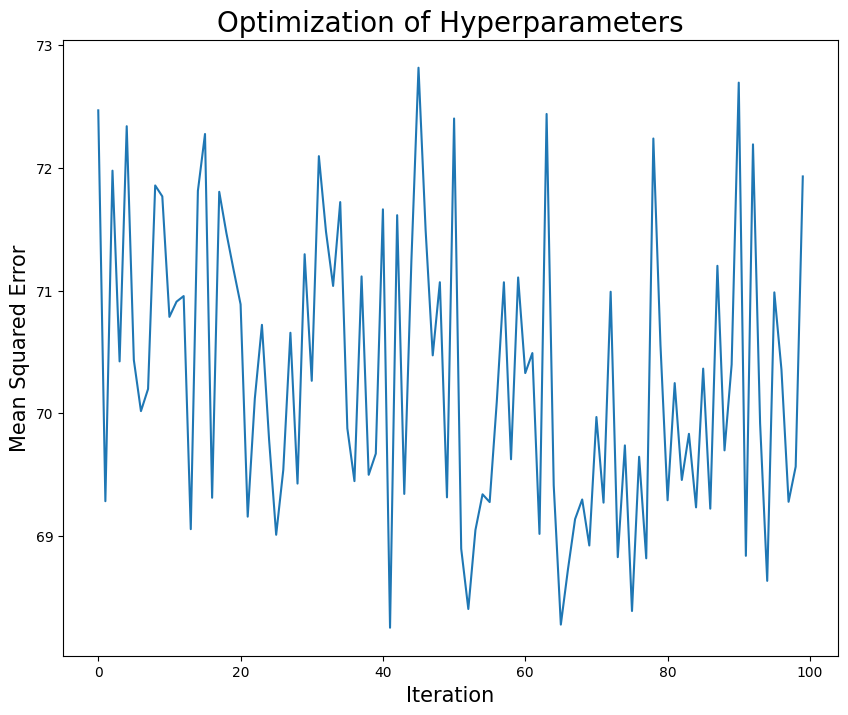

In [95]:
import matplotlib.pyplot as plt

# Extract loss values from trials
losses = [x['loss'] for x in trials.results]

# Create a range of iteration numbers
iterations = list(range(len(losses)))

# Create a plot
plt.figure(figsize=(10,8))
plt.plot(iterations, losses)
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.title('Optimization of Hyperparameters', fontsize=20)
plt.show()

In [96]:
from sklearn.utils import resample
import numpy as np

N = 100  # number of bootstrap samples
rmse_values = []

for _ in range(N):
    # Create a bootstrap sample
    X_train_sample, y_train_sample = resample(X_train, y_train)

    # Train the model on the bootstrap sample
    lgbm_model = LGBMRegressor(**best_corrected)
    lgbm_model.fit(X_train_sample, y_train_sample)

    # Make predictions on the validation set
    y_pred = lgbm_model.predict(X_test)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)

# Compute standard deviation, confidence intervals
std_dev = np.std(rmse_values)
confidence_interval = np.percentile(rmse_values, [2.5, 97.5])  # 95% confidence interval

print(f"Standard Deviation of RMSE: {std_dev}")
print(f"95% Confidence Interval of RMSE: {confidence_interval}")

[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min_data_in_leaf is set=41, min_child_samples=48 will be ignored. Current value: min_data_in_leaf=41
[LightGBM] [Warning] min

# Source of Improvements

## Different target

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()
cols_to_impute = target.columns.drop('Instrument')
target[cols_to_impute] = imputer.fit_transform(target[cols_to_impute])

# Separate input features and target variable
X = df.drop('Forward EV/EBITDA', axis=1) # drop the target variable and the date from the input features
y = target['Forward Enterprise Value To EBITDA (Daily Time Series Ratio)'] #this target is not accurate

# Align the number of samples in X and y
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples]
y = y[:n_samples]

# Verify the updated shapes
print(X.shape)
print(y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the XGBRegressor model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)#
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("The mean squared error (MSE) on test set (XGBRegressor): {:.4f}".format(mse_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("The R^2 score on the test set (XGBRegressor): {:.4f}".format(r2_xgb))


from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print("The mean squared error (MSE) on test set (AdaBoostRegressor): {:.4f}".format(mse_adaboost))
rmse_adaboost = sqrt(mse_adaboost)
print("The root mean squared error (RMSE) on test set (AdaBoostRegressor): {:.4f}".format(rmse_adaboost))
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("The R^2 score on the test set (AdaBoostRegressor): {:.4f}".format(r2_adaboost))

from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

histgb = HistGradientBoostingRegressor()
histgb.fit(X_train, y_train)
y_pred_histgb = histgb.predict(X_test)
mse_histgb = mean_squared_error(y_test, y_pred_histgb)
rmse_histgb = sqrt(mse_histgb)
r2_histgb = r2_score(y_test, y_pred_histgb)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_histgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_histgb))
print("The R^2 score on the test set: {:.4f}".format(r2_histgb))


(5558, 39)
(5558,)
The mean squared error (MSE) on test set (XGBRegressor): 1.4716
The R^2 score on the test set (XGBRegressor): 0.9335
The mean squared error (MSE) on test set (AdaBoostRegressor): 12.1812
The root mean squared error (RMSE) on test set (AdaBoostRegressor): 3.4902
The R^2 score on the test set (AdaBoostRegressor): 0.4500
The mean squared error (MSE) on test set: 1.4642
The root mean squared error (RMSE) on test set: 1.2100
The R^2 score on the test set: 0.9339


## Trasformations

In [98]:
 import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_trasformed.csv')
df = df.drop('Unnamed: 0', axis=1) #dropping the past index
df.head(5)

Instrument_encoded  TRBC_Industry_encoded          Year  Quarter   Month_x  \
0           -2.141308               0.136946  2.220446e-16   0.3887  0.432485   
1           -2.141308               0.136946  2.220446e-16   0.3887  0.432485   
2            1.579104               0.880180  2.220446e-16   0.3887  0.432485   
3            1.579104               0.880180  2.220446e-16   0.3887  0.432485   
4            1.579104               0.880180  2.220446e-16   0.3887  0.432485   

    Month_y  Forward EV/EBITDA    Revenue  Gross Profit       EBIT  ...  \
0 -0.394935          16.485255  22.678893     21.864862  21.337804  ...   
1 -0.394935          14.936336  22.678893     21.864862  21.337804  ...   
2 -0.394935          14.009946  23.513409     22.756326  21.764869  ...   
3 -0.394935          14.009946  23.513409     22.756326  21.764869  ...   
4 -0.394935          14.009946  23.513409     22.756326  21.764869  ...   

   fls_numerical  fls_classification_score      GDP  Stock traded pct GDP  \
0            2.0                  0.924926  2.07802              1.748546   
1            2.0                  0.924926  2.07802              1.748546   
2            2.0                  0.930455  2.07802              1.748546   
3            2.0                  0.930455  2.07802              1.748546   
4            2.0                  0.951082  2.07802              1.748546   

   Inflation pct  Unemployment Rate pct  Government Debt pct GDP  \
0       1.666255              -1.050052                -1.990493   
1       1.666255              -1.050052                -1.990493   
2       1.666255              -1.050052                -1.990493   
3       1.666255              -1.050052                -1.990493   
4       1.666255              -1.050052                -1.990493   

   Balance of Trade  Exchange Rate USD  Government Consumption pct GDP  
0         -1.456665           0.212438                       -2.311258  
1         -1.456665           0.212438                       -2.311258  
2         -1.456665           0.212438                       -2.311258  
3         -1.456665           0.212438                       -2.311258  
4         -1.456665           0.212438                       -2.311258  

[5 rows x 40 columns]

In [99]:
import pandas as pd
target = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Raw/sp500_target_variables.csv')
#target = df.drop('Unnamed: 0', axis=1) #dropping the past index
target.head(5)

Instrument  Forward Enterprise Value To EBITDA (Daily Time Series Ratio)  \
0    POOL.OQ                                          15.585242              
1    POOL.OQ                                          15.366744              
2    POOL.OQ                                          15.453976              
3    POOL.OQ                                          15.056633              
4    POOL.OQ                                          14.846725              

   Enterprise Value To EBITDA (Daily Time Series Ratio)  \
0                                          16.200543      
1                                          15.973329      
2                                          16.153896      
3                                          15.738591      
4                                          15.519277      

   EV / Free Cash Flow (SmartEstimate ®)  P/E (Daily Time Series Ratio)  \
0                              31.632597                      20.229126   
1                              31.188947                      19.917965   
2                              31.541516                      20.165245   
3                              30.730606                      19.596499   
4                              30.302381                      19.296156   

   Forward P/E (Daily Time Series Ratio)  
0                              21.400266  
1                              21.073564  
2                              21.081195  
3                              20.488317  
4                              20.179335

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()
cols_to_impute = target.columns.drop('Instrument')
target[cols_to_impute] = imputer.fit_transform(target[cols_to_impute])

# Separate input features and target variable
X = df.drop('Forward EV/EBITDA', axis=1) # drop the target variable and the date from the input features
y = target['EV / Free Cash Flow (SmartEstimate ®)']

# Align the number of samples in X and y
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples]
y = y[:n_samples]

# Verify the updated shapes
print(X.shape)
print(y.shape)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the XGBRegressor model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)#
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("The mean squared error (MSE) on test set (XGBRegressor): {:.4f}".format(mse_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print("The R^2 score on the test set (XGBRegressor): {:.4f}".format(r2_xgb))


from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# AdaBoostRegressor
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
print("The mean squared error (MSE) on test set (AdaBoostRegressor): {:.4f}".format(mse_adaboost))
rmse_adaboost = sqrt(mse_adaboost)
print("The root mean squared error (RMSE) on test set (AdaBoostRegressor): {:.4f}".format(rmse_adaboost))
r2_adaboost = r2_score(y_test, y_pred_adaboost)
print("The R^2 score on the test set (AdaBoostRegressor): {:.4f}".format(r2_adaboost))


from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

histgb = HistGradientBoostingRegressor()
histgb.fit(X_train, y_train)
y_pred_histgb = histgb.predict(X_test)
mse_histgb = mean_squared_error(y_test, y_pred_histgb)
rmse_histgb = sqrt(mse_histgb)
r2_histgb = r2_score(y_test, y_pred_histgb)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse_histgb))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_histgb))
print("The R^2 score on the test set: {:.4f}".format(r2_histgb))

(5558, 39)
(5558,)
The mean squared error (MSE) on test set (XGBRegressor): 104.3473
The R^2 score on the test set (XGBRegressor): 0.7986
The mean squared error (MSE) on test set (AdaBoostRegressor): 227.1858
The root mean squared error (RMSE) on test set (AdaBoostRegressor): 15.0727
The R^2 score on the test set (AdaBoostRegressor): 0.5615
The mean squared error (MSE) on test set: 73.3153
The root mean squared error (RMSE) on test set: 8.5624
The R^2 score on the test set: 0.8585


# Exploring the predictions

**before running this section, reload the data required, code, modelling, splitting in x and y an splin in train test sections**

In [164]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming we have our training data in X_train, y_train and testing data in X_test, y_test

# Train the model
lgbm_model = LGBMRegressor(objective ='regression')  # using regression as our objective function
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("The mean squared error (MSE) on test set: {:.4f}".format(mse_lgbm))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_lgbm))
print("The R^2 score on the test set: {:.4f}".format(r2_lgbm))


The mean squared error (MSE) on test set: 71.2655
The root mean squared error (RMSE) on test set: 8.4419
The R^2 score on the test set: 0.8624


### Discount

In [163]:
import pandas as pd
df_encoding= pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /sp500_encoded_translation.csv')
#df_encoding = encoding_translations.drop('Unnamed: 0', axis=1) #dropping the past index
df_encoding.head(5)

Unnamed: 0 Instrument            TRBC Industry Group Name  Year  Quarter  \
0           0      AJG.N                           Insurance  2022        4   
1           1      AJG.N                           Insurance  2022        4   
2           2       WM.N  Professional & Commercial Services  2022        4   
3           3       WM.N  Professional & Commercial Services  2022        4   
4           4       WM.N  Professional & Commercial Services  2022        4   

   Month_x  Forward EV/EBITDA       Revenue  Gross Profit          EBIT  ...  \
0       12          16.485255  7.068353e+09  3.131764e+09  1.848803e+09  ...   
1       12          14.936336  7.068353e+09  3.131764e+09  1.848803e+09  ...   
2       12          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   
3       12          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   
4       12          14.009946  1.628335e+10  7.637419e+09  2.833756e+09  ...   

   esg_classification_score  fls_classification_score  sentiment_numerical  \
0                  0.972354                  0.961731                    0   
1                  0.972354                  0.961731                    0   
2                  0.955455                  0.964601                    0   
3                  0.955455                  0.964601                    0   
4                  0.982862                  0.975234                    0   

   esg_numerical  fls_numerical  Month_y  Instrument_encoded  \
0              4              2       10                   1   
1              4              2       10                   1   
2              4              2       10                 145   
3              4              2       10                 145   
4              4              2       10                 145   

   TRBC_Industry_encoded  Guidance Measure_encoded  Doc_Type_encoded  
0                     21                         0                 1  
1                     21                         0                 1  
2                     31                         0                 1  
3                     31                         0                 1  
4                     31                         0                 1  

[5 rows x 47 columns]

In [165]:
df_encoding= df_encoding[['Instrument', 'TRBC Industry Group Name','Instrument_encoded','TRBC_Industry_encoded',]]

In [166]:
predictions = pd.DataFrame()
predictions['Instrument'] = X_test['Instrument_encoded']
predictions['Year'] = X_test['Year']
predictions['TRBC_Industry_encoded'] = X_test['TRBC_Industry_encoded']
predictions['actual'] = X_test['Enterprise Value'] / X_test['EBITDA']
predictions['predictions'] = y_pred_lgbm
predictions['percentage'] = (predictions['predictions'] - predictions['actual']) / predictions['actual']
predictions

Instrument  Year  TRBC_Industry_encoded     actual  predictions  \
3041          44  2019                     25  17.054407    15.914592   
2416          55  2020                     17  11.510515    29.166523   
4643          30  2018                     16  25.230018    25.890098   
4462         127  2018                     36   7.509534   152.040222   
4937           3  2018                      4   9.566769    33.282675   
...          ...   ...                    ...        ...          ...   
539           25  2022                     30  15.852244    18.768531   
4105          44  2018                     25   5.221265    38.304184   
804           34  2021                     19  23.642308    36.395666   
3012         106  2019                     31  19.030941    18.185551   
2904         100  2020                     11   7.935629    14.843009   

      percentage  
3041   -0.066834  
2416    1.533903  
4643    0.026162  
4462   19.246293  
4937    2.478988  
...          ...  
539     0.183967  
4105    6.336189  
804     0.539429  
3012   -0.044422  
2904    0.870426  

[1112 rows x 6 columns]

In [167]:
translations = df_encoding[['TRBC_Industry_encoded','TRBC Industry Group Name','Instrument_encoded','Instrument']]
translations

TRBC_Industry_encoded            TRBC Industry Group Name  \
0                        21                           Insurance   
1                        21                           Insurance   
2                        31  Professional & Commercial Services   
3                        31  Professional & Commercial Services   
4                        31  Professional & Commercial Services   
...                     ...                                 ...   
5553                     21                           Insurance   
5554                     21                           Insurance   
5555                     21                           Insurance   
5556                     21                           Insurance   
5557                     21                           Insurance   

      Instrument_encoded Instrument  
0                      1      AJG.N  
1                      1      AJG.N  
2                    145       WM.N  
3                    145       WM.N  
4                    145       WM.N  
...                  ...        ...  
5553                 148     WTW.OQ  
5554                 148     WTW.OQ  
5555                 148     WTW.OQ  
5556                 148     WTW.OQ  
5557                 148     WTW.OQ  

[5558 rows x 4 columns]

In [168]:
# Merge the dataframes on 'Instrument' and 'TRBC_Industry_encoded'
merged_df = predictions.merge(df_encoding, left_on=['Instrument', 'TRBC_Industry_encoded'],
                              right_on=['Instrument_encoded', 'TRBC_Industry_encoded'],
                              how='left')
merged_df.shape

(82932, 9)

In [169]:
# Ensure that the merging columns have the same data type
predictions['Instrument'] = predictions['Instrument'].astype(float)
translations['Instrument_encoded'] = translations['Instrument_encoded'].astype(float)

predictions['TRBC_Industry_encoded'] = predictions['TRBC_Industry_encoded'].astype(float)
translations['TRBC_Industry_encoded'] = translations['TRBC_Industry_encoded'].astype(float)

# Merge the dataframes
merged_df = pd.merge(predictions, translations, how='left',
                     left_on=['Instrument', 'TRBC_Industry_encoded'],
                     right_on=['Instrument_encoded', 'TRBC_Industry_encoded'])

In [170]:
merged_df

Instrument_x  Year  TRBC_Industry_encoded     actual  predictions  \
0              44.0  2019                   25.0  17.054407    15.914592   
1              44.0  2019                   25.0  17.054407    15.914592   
2              44.0  2019                   25.0  17.054407    15.914592   
3              44.0  2019                   25.0  17.054407    15.914592   
4              44.0  2019                   25.0  17.054407    15.914592   
...             ...   ...                    ...        ...          ...   
82927         100.0  2020                   11.0   7.935629    14.843009   
82928         100.0  2020                   11.0   7.935629    14.843009   
82929         100.0  2020                   11.0   7.935629    14.843009   
82930         100.0  2020                   11.0   7.935629    14.843009   
82931         100.0  2020                   11.0   7.935629    14.843009   

       percentage   TRBC Industry Group Name  Instrument_encoded Instrument_y  
0       -0.066834            Metals & Mining                44.0        FCX.N  
1       -0.066834            Metals & Mining                44.0        FCX.N  
2       -0.066834            Metals & Mining                44.0        FCX.N  
3       -0.066834            Metals & Mining                44.0        FCX.N  
4       -0.066834            Metals & Mining                44.0        FCX.N  
...           ...                        ...                 ...          ...  
82927    0.870426  Electric Utilities & IPPs               100.0        NRG.N  
82928    0.870426  Electric Utilities & IPPs               100.0        NRG.N  
82929    0.870426  Electric Utilities & IPPs               100.0        NRG.N  
82930    0.870426  Electric Utilities & IPPs               100.0        NRG.N  
82931    0.870426  Electric Utilities & IPPs               100.0        NRG.N  

[82932 rows x 9 columns]

In [171]:
# Merge the dataframes on 'Instrument' and 'TRBC_Industry_encoded'
merged_df_2 = df_encoding.merge(predictions, left_on=['Instrument_encoded', 'TRBC_Industry_encoded'],
                              right_on=['Instrument', 'TRBC_Industry_encoded'],
                              how='left')
merged_df_2.shape

(83034, 9)

In [172]:
merged_df_2

Instrument_x            TRBC Industry Group Name  Instrument_encoded  \
0            AJG.N                           Insurance                   1   
1            AJG.N                           Insurance                   1   
2            AJG.N                           Insurance                   1   
3            AJG.N                           Insurance                   1   
4             WM.N  Professional & Commercial Services                 145   
...            ...                                 ...                 ...   
83029       WTW.OQ                           Insurance                 148   
83030       WTW.OQ                           Insurance                 148   
83031       WTW.OQ                           Insurance                 148   
83032       WTW.OQ                           Insurance                 148   
83033       WTW.OQ                           Insurance                 148   

       TRBC_Industry_encoded  Instrument_y    Year     actual  predictions  \
0                         21           1.0  2019.0  16.992665    23.440000   
1                         21           1.0  2019.0  20.629560    23.181653   
2                         21           1.0  2019.0  16.992665    23.440000   
3                         21           1.0  2019.0  20.629560    23.181653   
4                         31         145.0  2022.0  14.925580    28.245744   
...                      ...           ...     ...        ...          ...   
83029                     21         148.0  2018.0  16.683054    31.571517   
83030                     21         148.0  2018.0  16.821549    31.504693   
83031                     21         148.0  2018.0  16.683054    31.571517   
83032                     21         148.0  2018.0  14.508859    31.685524   
83033                     21         148.0  2018.0  14.508859    31.685524   

       percentage  
0        0.379419  
1        0.123711  
2        0.379419  
3        0.123711  
4        0.892439  
...           ...  
83029    0.892430  
83030    0.872877  
83031    0.892430  
83032    1.183874  
83033    1.183874  

[83034 rows x 9 columns]

In [173]:
merged_df.isna().sum()

Instrument_x                0
Year                        0
TRBC_Industry_encoded       0
actual                      0
predictions                 0
percentage                  0
TRBC Industry Group Name    0
Instrument_encoded          0
Instrument_y                0
dtype: int64

In [174]:
industry = merged_df.groupby(['TRBC Industry Group Name','Year']).mean()[['actual','predictions','percentage']]
industry

actual  predictions  percentage
TRBC Industry Group Name    Year                                    
Aerospace & Defense         2018  20.821879    22.900363    0.114439
                            2019  14.450297    27.367940    0.901575
                            2020  14.108598    23.175543    0.712532
                            2021  19.166616    36.512478    0.965780
                            2022  14.818288    18.129997    0.246250
...                                     ...          ...         ...
Telecommunications Services 2019   6.762203     8.228337    0.200735
                            2020   9.837660    37.983376    2.881870
                            2021   7.452401    24.656295    2.357825
                            2022   5.999365    19.031116    2.363415
Textiles & Apparel          2022   5.270208    29.111190    4.523727

[130 rows x 3 columns]

In [176]:
# Check the shape of the dataframe to make sure it's not empty
print(merged_df.shape)

# Check the unique values in the 'TRBC Industry Group Name' column
print(merged_df["TRBC Industry Group Name"].unique())

(82932, 9)
['Metals & Mining' 'Healthcare Providers & Services'
 'Healthcare Equipment & Supplies' 'Telecommunications Services'
 'Chemicals' 'Oil & Gas Related Equipment and Services'
 'Hotels & Entertainment Services'
 'Personal & Household Products & Services' 'Automobiles & Auto Parts'
 'Electric Utilities & IPPs' 'Media & Publishing' 'Diversified Retail'
 'Construction Materials' 'Professional & Commercial Services'
 'Food & Tobacco' 'Machinery, Tools, Heavy Vehicles, Trains & Ships'
 'Containers & Packaging' 'Aerospace & Defense'
 'Financial Technology (Fintech) & Infrastructure'
 'Residential & Commercial REITs' 'Homebuilding & Construction Supplies'
 'Consumer Goods Conglomerates' 'Household Goods' 'Oil & Gas'
 'Software & IT Services' 'Semiconductors & Semiconductor Equipment'
 'Biotechnology & Medical Research' 'Pharmaceuticals'
 'Construction & Engineering' 'Communications & Networking' 'Insurance'
 'Multiline Utilities' 'Investment Banking & Investment Services'
 'Food & Dr

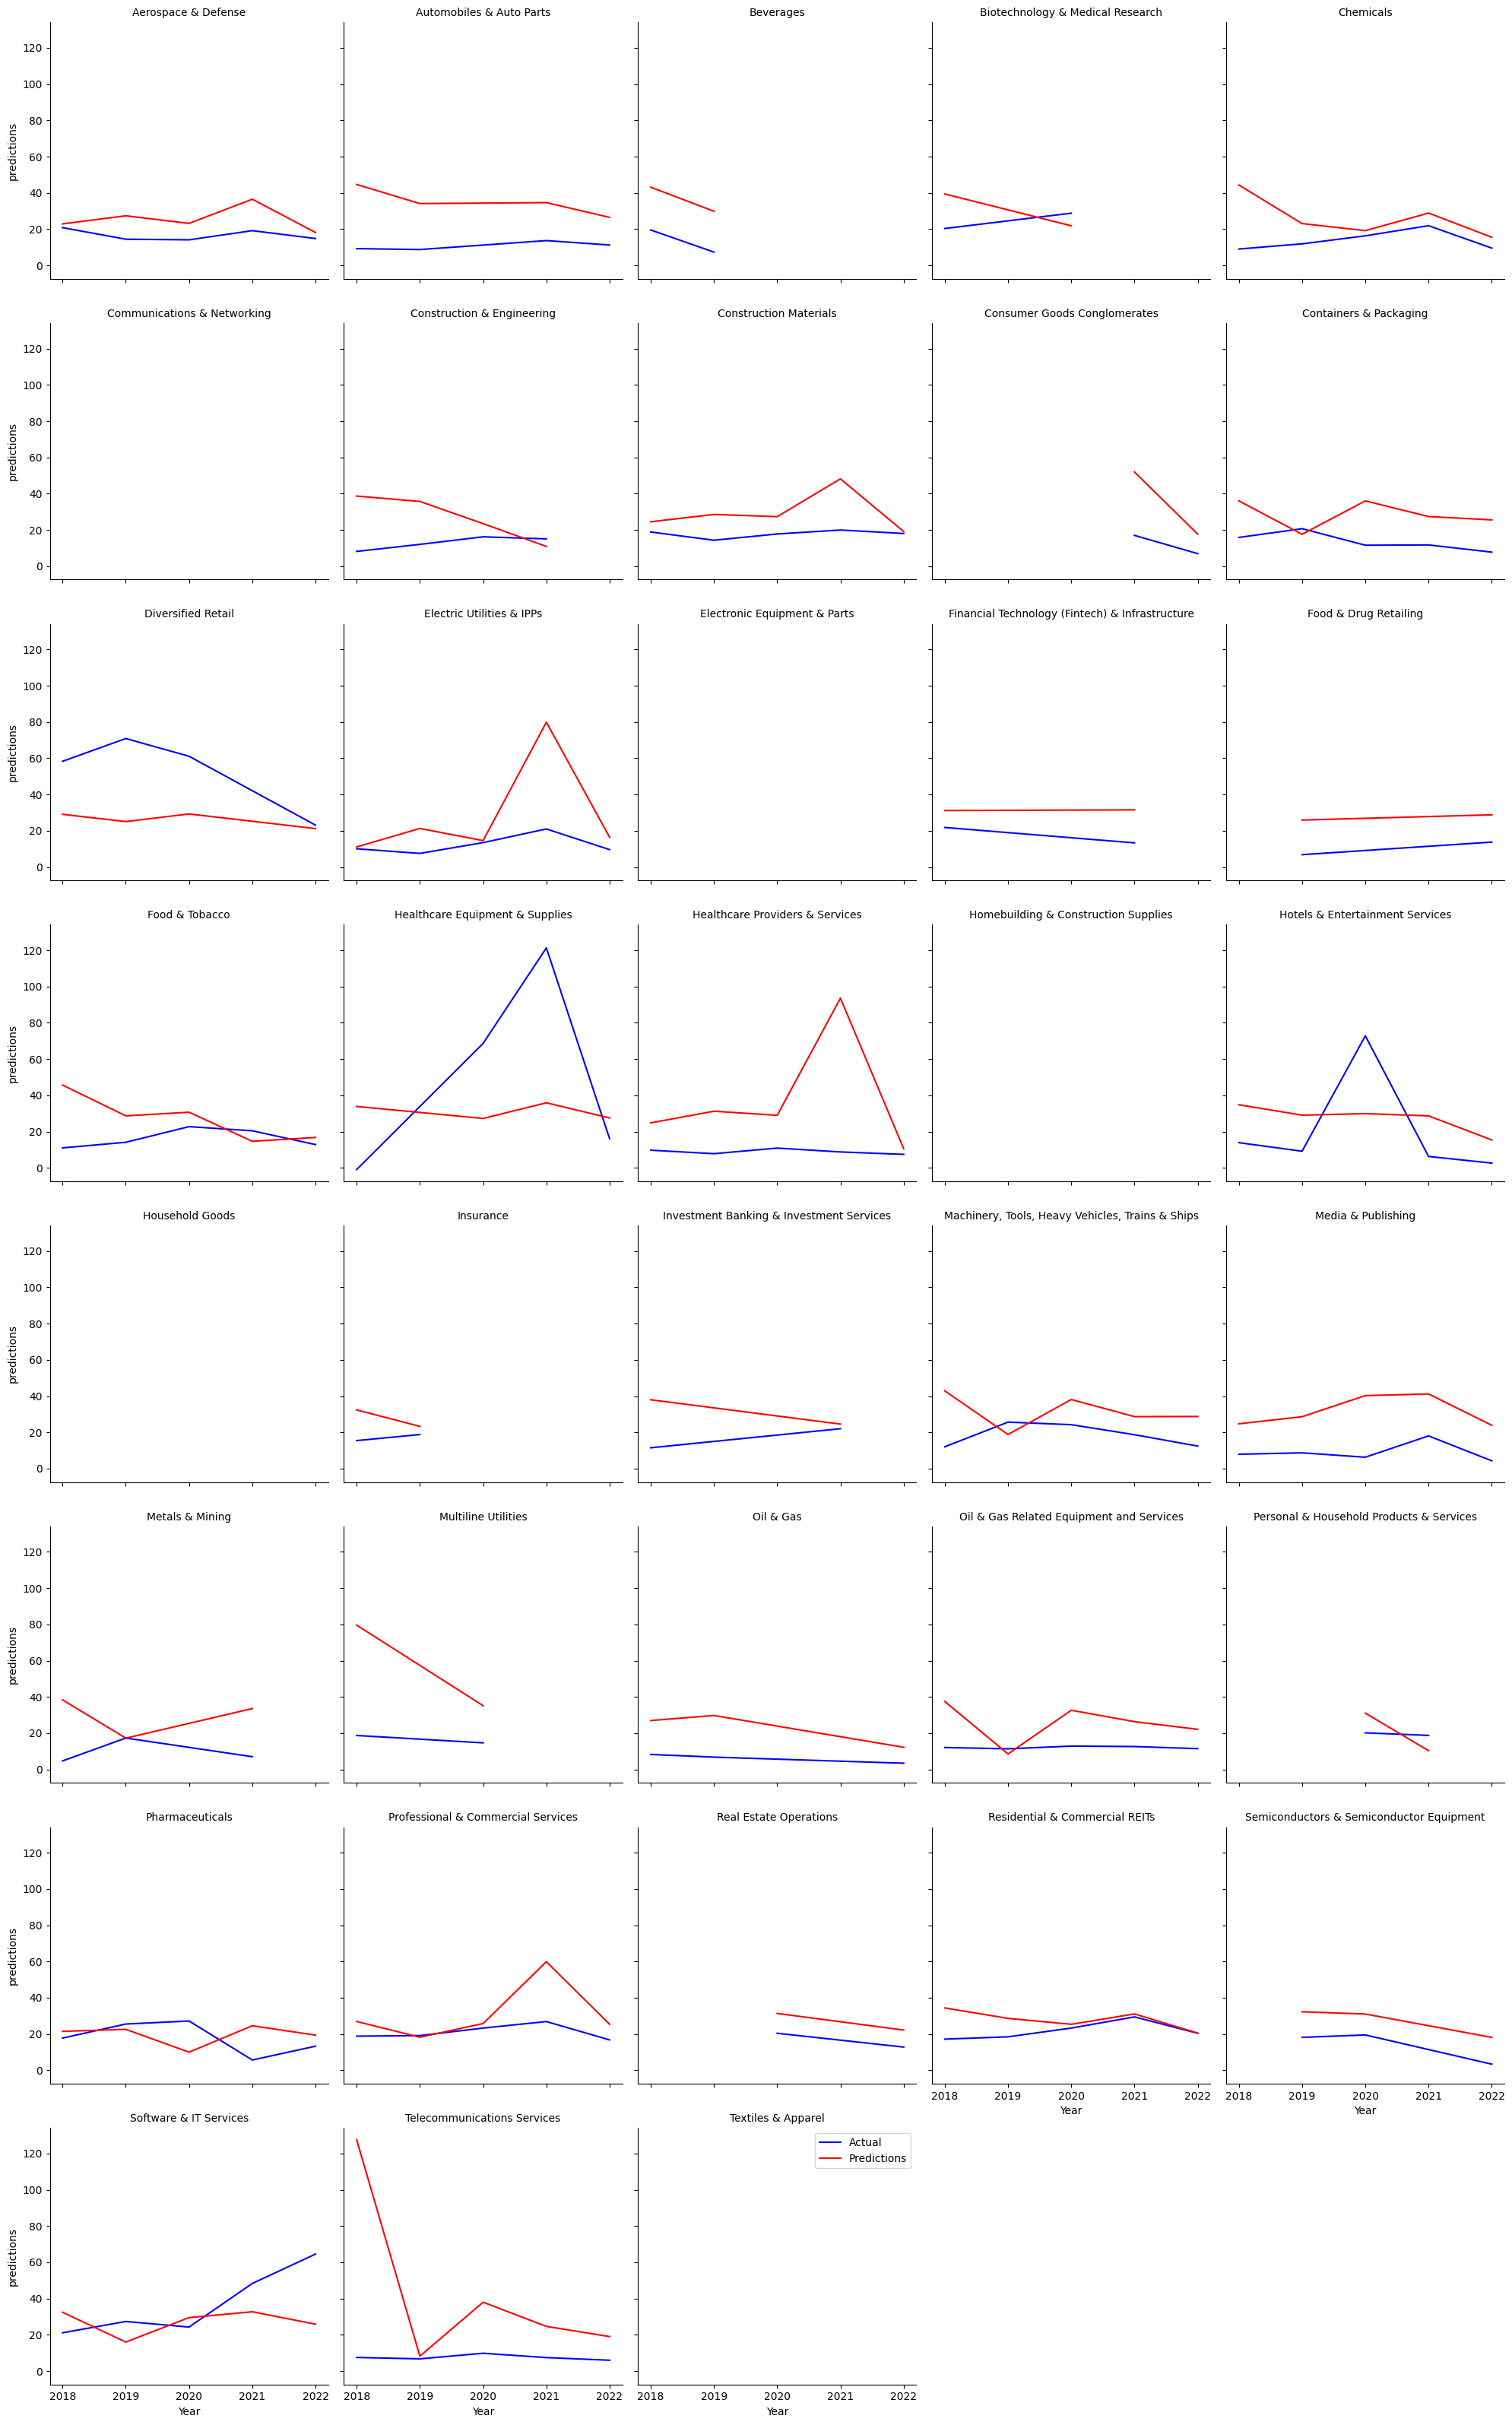

In [177]:
import seaborn as sns

# Reset the index to allow for easier plotting
industry = industry.reset_index()

# Define the grid
grid = sns.FacetGrid(industry, col="TRBC Industry Group Name", col_wrap=5, height=4)

# Map the lineplots
grid.map(sns.lineplot, 'Year', 'actual', color='blue', label='Actual')
grid.map(sns.lineplot, 'Year', 'predictions', color='red', label='Predictions')

# Add a legend
plt.legend(loc='upper right')

# Set the plot title for each subplot
grid.set_titles("{col_name}")

plt.show()

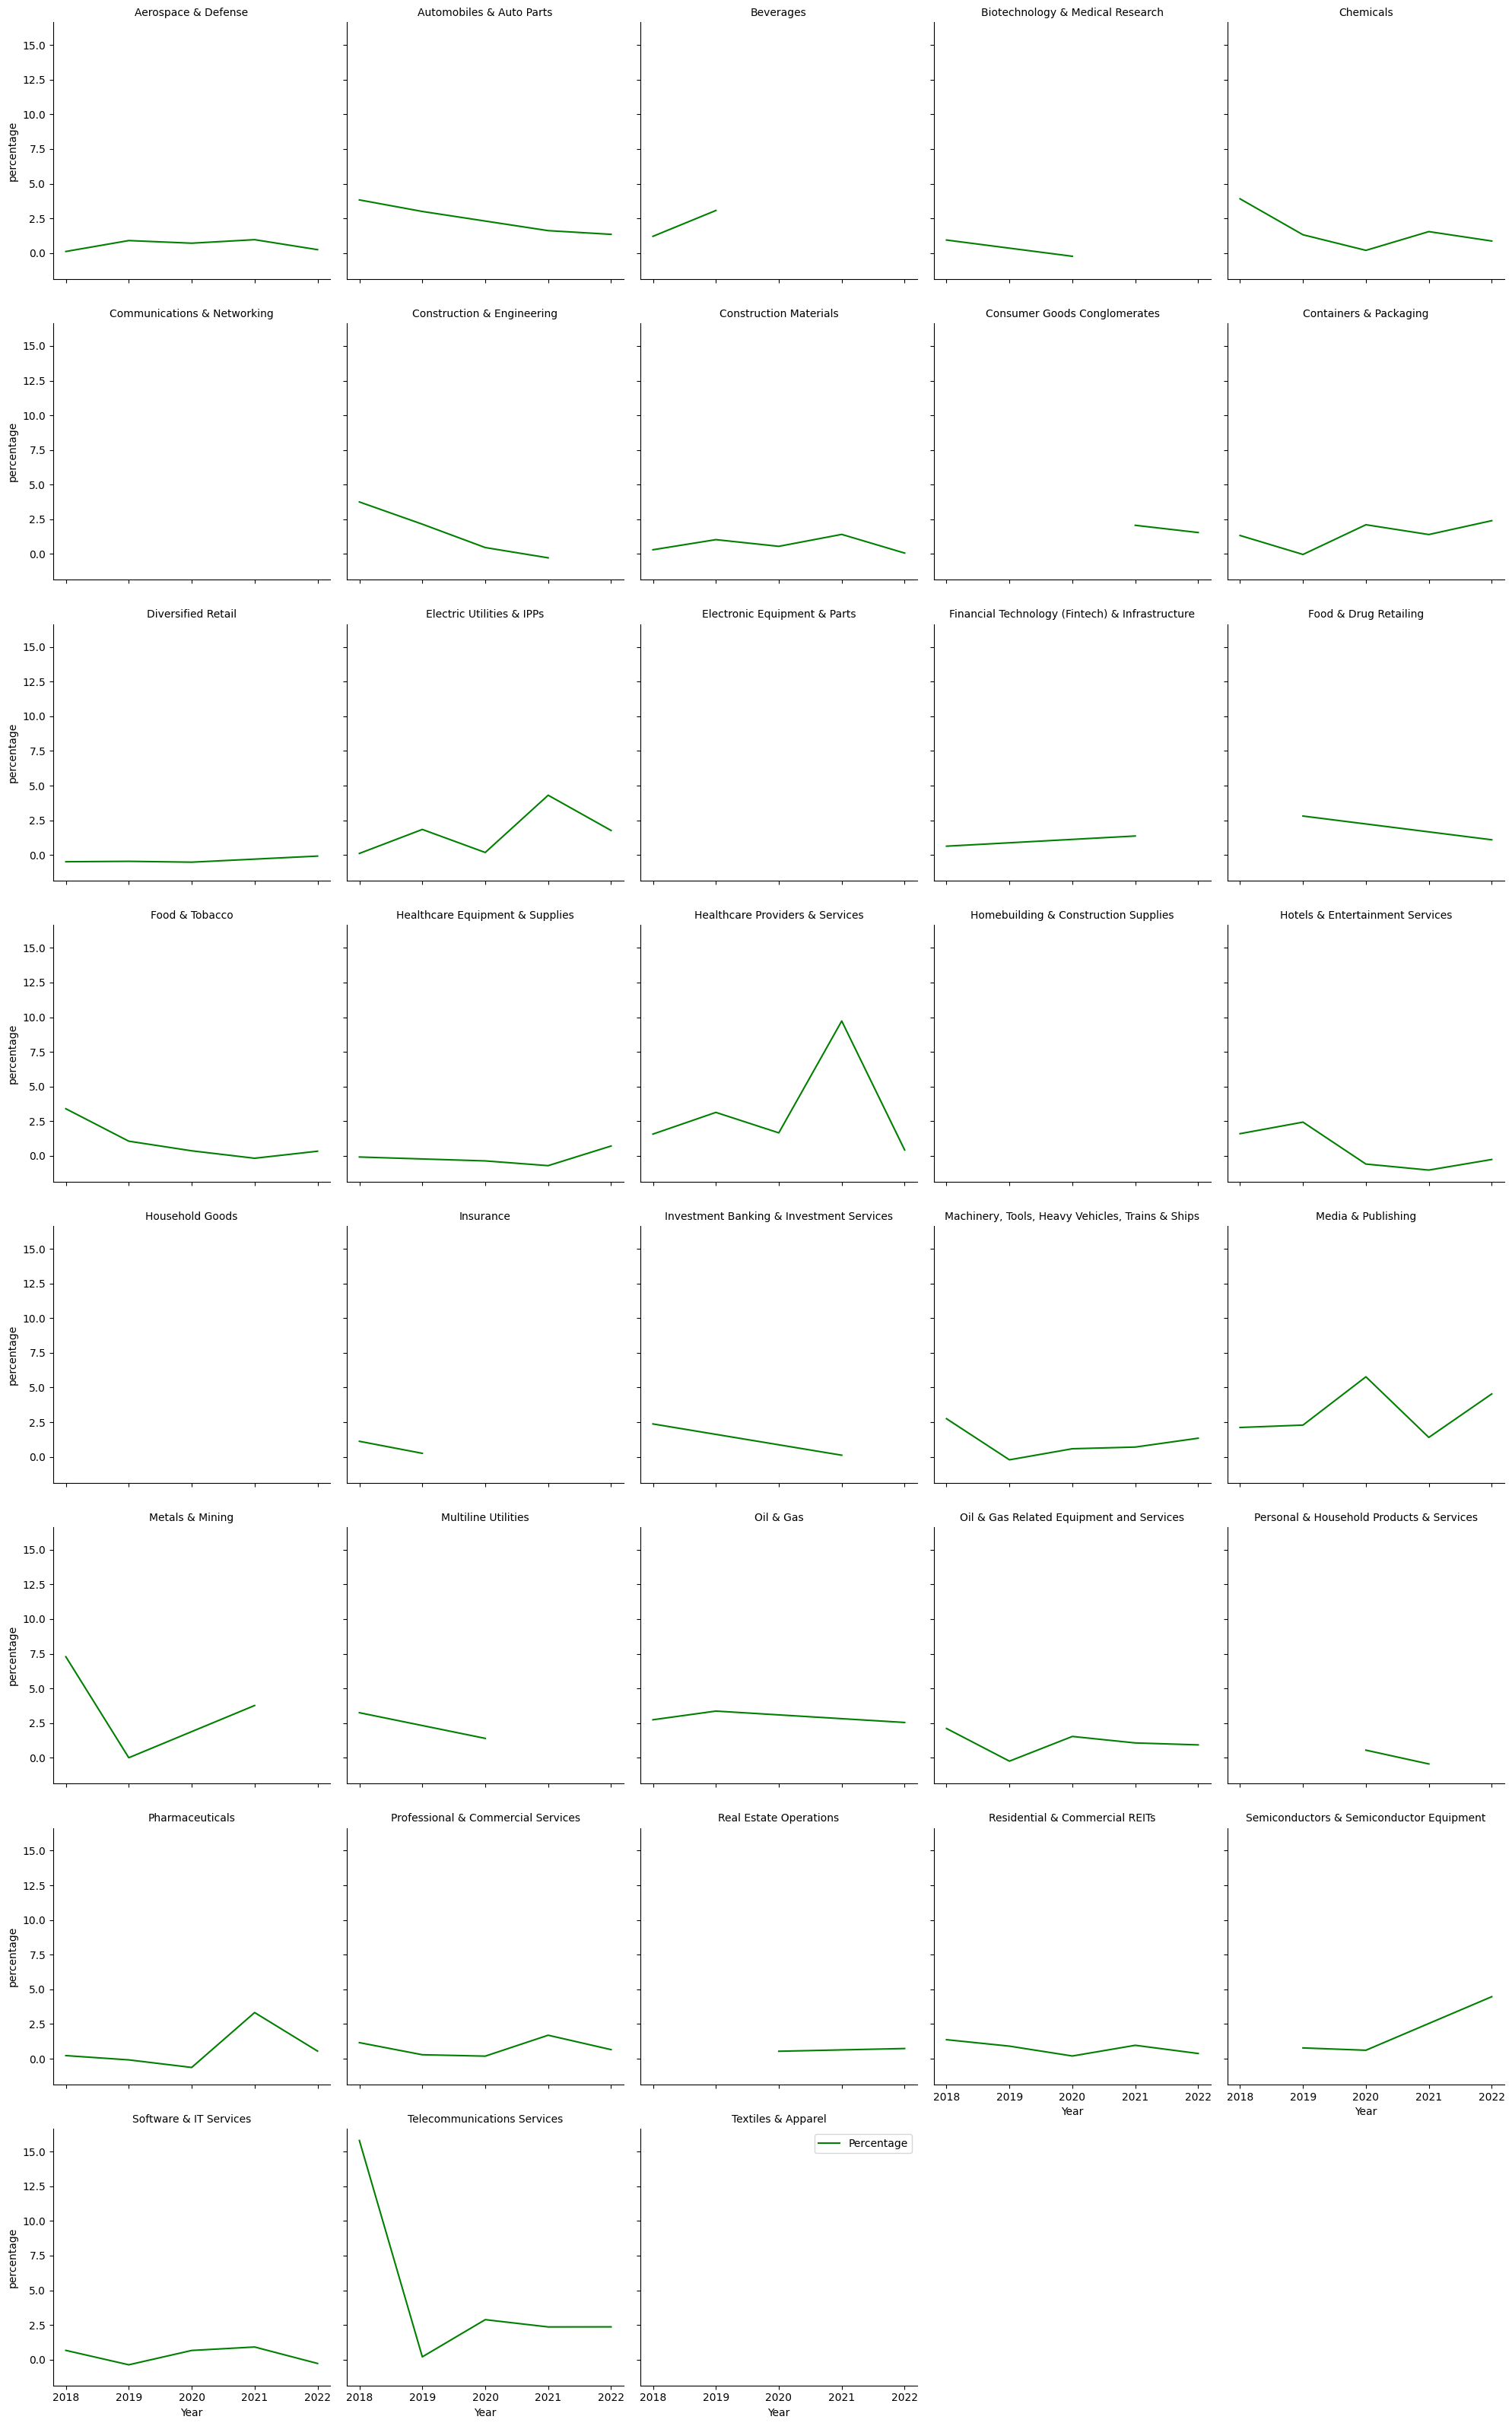

In [178]:
import seaborn as sns

# Reset the index to allow for easier plotting
industry = industry.reset_index()

# Define the grid
grid = sns.FacetGrid(industry, col="TRBC Industry Group Name", col_wrap=5, height=4)

# Map the lineplots for 'percentage'
grid.map(sns.lineplot, 'Year', 'percentage', color='green', label='Percentage')

# Add a legend
plt.legend(loc='upper right')

# Set the plot title for each subplot
grid.set_titles("{col_name}")

plt.show()

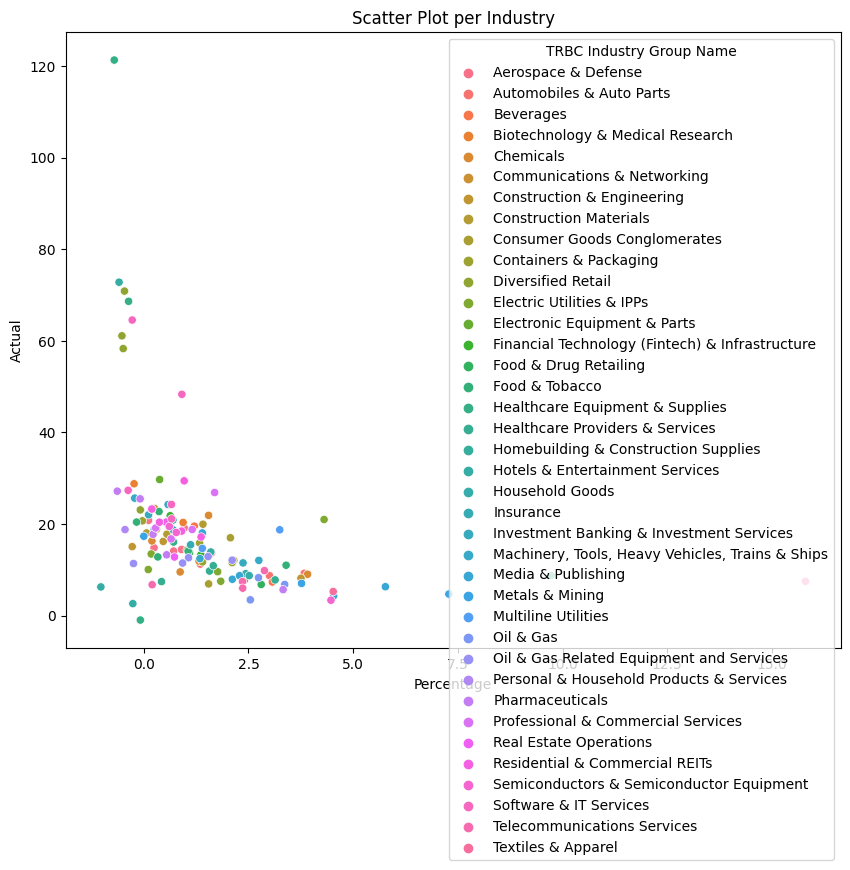

In [179]:

import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to allow for easier plotting
#industry = industry.reset_index()

# Create a scatter plot with different colors for each 'TRBC Industry Group Name'
plt.figure(figsize=(10,8))
sns.scatterplot(data=industry, x='percentage', y='actual', hue='TRBC Industry Group Name')

# Add title and labels
plt.title('Scatter Plot per Industry')
plt.xlabel('Percentage')
plt.ylabel('Actual')

plt.show()


### industry mapping

In [180]:
industry_group_mapping = {
    'Communications & Networking': 'Tech',
    'Electronic Equipment & Parts': 'Tech',
    'Financial Technology (Fintech) & Infrastructure': 'Tech',
    'Software & IT Services': 'Tech',
    'Semiconductors & Semiconductor Equipment': 'Tech',
    'Insurance': 'Finance',
    'Investment Banking & Investment Services': 'Finance',
    'Multiline Utilities': 'Finance',
    'Real Estate Operations': 'Finance',
    'Residential & Commercial REITs': 'Finance',
    'Biotechnology & Medical Research': 'Healthcare and Pharmaceuticals',
    'Healthcare Equipment & Supplies': 'Healthcare and Pharmaceuticals',
    'Healthcare Providers & Services': 'Healthcare and Pharmaceuticals',
    'Pharmaceuticals': 'Healthcare and Pharmaceuticals',
    'Automobiles & Auto Parts': 'Consumer Goods and Retail',
    'Beverages': 'Consumer Goods and Retail',
    'Consumer Goods Conglomerates': 'Consumer Goods and Retail',
    'Diversified Retail': 'Consumer Goods and Retail',
    'Food & Drug Retailing': 'Consumer Goods and Retail',
    'Food & Tobacco': 'Consumer Goods and Retail',
    'Household Goods': 'Consumer Goods and Retail',
    'Personal & Household Products & Services': 'Consumer Goods and Retail',
    'Textiles & Apparel': 'Consumer Goods and Retail',
    'Electric Utilities & IPPs': 'Energy and Utilities',
    'Oil & Gas': 'Energy and Utilities',
    'Oil & Gas Related Equipment and Services': 'Energy and Utilities',
    'Aerospace & Defense': 'Industrial and Construction',
    'Construction & Engineering': 'Industrial and Construction',
    'Construction Materials': 'Industrial and Construction',
    'Machinery, Tools, Heavy Vehicles, Trains & Ships': 'Industrial and Construction',
    'Metals & Mining': 'Industrial and Construction',
    'Hotels & Entertainment Services': 'Media, Entertainment, and Services',
    'Media & Publishing': 'Media, Entertainment, and Services',
    'Professional & Commercial Services': 'Media, Entertainment, and Services',
    'Telecommunications Services': 'Media, Entertainment, and Services',
    'Chemicals': 'Others',
    'Containers & Packaging': 'Others',
    'Homebuilding & Construction Supplies': 'Others'
}


industry['Industry Group'] = industry['TRBC Industry Group Name'].map(industry_group_mapping)

In [181]:
fig = px.scatter(industry, x='percentage', y='actual', color='Industry Group')

fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

fig.show()

In [182]:
# Filter data to remove outliers
industry_filtered = industry[(industry['percentage'] < 4) & (industry['actual'] < 80)]

# Create a scatter plot
fig = px.scatter(industry_filtered, x='percentage', y='actual', color='Industry Group')

fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

fig.show()

In [183]:
import plotly.graph_objects as go

fig = go.Figure()

for industry_group in industry_filtered['Industry Group'].unique():
    industry_subset = industry_filtered[industry_filtered['Industry Group'] == industry_group]
    fig.add_traces(px.scatter(industry_subset, x='percentage', y='actual', trendline='ols').data)

fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

fig.show()

In [184]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create an empty subplot and set the layout
fig = make_subplots()
fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

# Get the color_discrete_sequence from plotly.express
colors = px.colors.qualitative.Plotly

# Get the unique list of 'Industry Group'
industry_groups = industry_filtered['Industry Group'].unique()

# Loop over industry_groups
for i, industry_group in enumerate(industry_groups):
    # Create a new DataFrame for each industry_group
    industry_subset = industry_filtered[industry_filtered['Industry Group'] == industry_group]

    # Fit the trendline
    trend_df = px.scatter(industry_subset, x='percentage', y='actual', trendline='ols').data[1]

    # Add a scatter plot for each industry_group
    fig.add_trace(
        go.Scatter(x=industry_subset['percentage'], y=industry_subset['actual'], mode='markers', name=industry_group, marker_color=colors[i % len(colors)]),
    )

    # Add a trendline for each industry_group
    fig.add_trace(
        go.Scatter(x=trend_df['x'], y=trend_df['y'], mode='lines', name=f"{industry_group} Trendline", line_color=colors[i % len(colors)]),
    )

# Show the plot
fig.show()

In [185]:
# Create a new DataFrame that only contains the rows for 2022
industry_2022 = industry_filtered[industry_filtered['Year'] == 2022]

# Now create the scatter plot for just 2022
fig = make_subplots()
fig.update_layout(title='Valuation (EV/EBITDA) vs YoY Growth for 2022',
                  xaxis_title='Year over Year Growth (percentage)',
                  yaxis_title='Valuation (EV/EBITDA)')

# Get the unique list of 'Industry Group'
industry_groups = industry_2022['Industry Group'].unique()

# Loop over industry_groups
for i, industry_group in enumerate(industry_groups):
    # Create a new DataFrame for each industry_group
    industry_subset = industry_2022[industry_2022['Industry Group'] == industry_group]

    # Fit the trendline
    trend_df = px.scatter(industry_subset, x='percentage', y='actual', trendline='ols').data[1]

    # Add a scatter plot for each industry_group
    fig.add_trace(
        go.Scatter(x=industry_subset['percentage'], y=industry_subset['actual'], mode='markers', name=industry_group, marker_color=colors[i % len(colors)]),
    )

    # Add a trendline for each industry_group
    fig.add_trace(
        go.Scatter(x=trend_df['x'], y=trend_df['y'], mode='lines', name=f"{industry_group} Trendline", line_color=colors[i % len(colors)]),
    )

# Show the plot
fig.show()

In [186]:
# Define the years we're interested in
years = [2019, 2020, 2021, 2022]

# Create a figure with 1 row and 4 columns
fig = make_subplots(rows=1, cols=4, subplot_titles=[str(year) for year in years])

# Loop over the years
for i, year in enumerate(years):
    # Create a subset of the data for the current year
    yearly_data = industry_filtered[industry_filtered['Year'] == year]

    # Get the unique list of 'Industry Group'
    industry_groups = yearly_data['Industry Group'].unique()

    # Loop over industry_groups
    for j, industry_group in enumerate(industry_groups):
        # Create a new DataFrame for each industry_group
        industry_subset = yearly_data[yearly_data['Industry Group'] == industry_group]

        # Fit the trendline
        trend_df = px.scatter(industry_subset, x='percentage', y='actual', trendline='ols').data[1]

        # Add a scatter plot for each industry_group
        fig.add_trace(
            go.Scatter(x=industry_subset['percentage'], y=industry_subset['actual'], mode='markers', name=industry_group, marker_color=colors[j % len(colors)]),
            row=1, col=i+1
        )

        # Add a trendline for each industry_group
        #fig.add_trace(
        #    go.Scatter(x=trend_df['x'], y=trend_df['y'], mode='lines', name=f"{industry_group} Trendline", line_color=colors[j % len(colors)]),
        #    row=1, col=i+1
       # )

# Update layout
fig.update_layout(height=400, width=1200, title_text="Valuation (EV/EBITDA) vs YoY Growth for 2019-2022")

# Show the plot
fig.show()

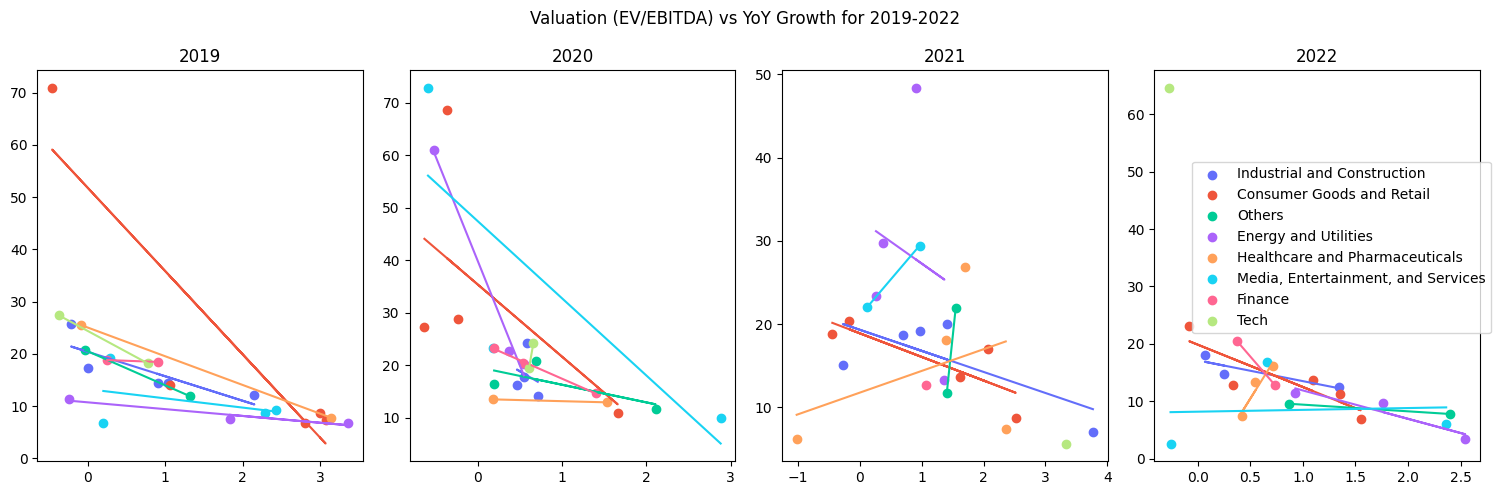

In [187]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Define the years we're interested in
years = [2019, 2020, 2021, 2022]

# Create a figure with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Loop over the years
for i, year in enumerate(years):
    # Create a subset of the data for the current year
    yearly_data = industry_filtered[industry_filtered['Year'] == year]

    # Get the unique list of 'Industry Group'
    industry_groups = yearly_data['Industry Group'].unique()

    # Loop over industry_groups
    for j, industry_group in enumerate(industry_groups):
        # Create a new DataFrame for each industry_group
        industry_subset = yearly_data[yearly_data['Industry Group'] == industry_group]

        # Fit the trendline
        X = industry_subset['percentage'].values.reshape(-1,1)
        y = industry_subset['actual'].values
        reg = LinearRegression().fit(X, y)

        # Make predictions using the testing set
        y_pred = reg.predict(X)

        # Scatter plot
        axs[i].scatter(X, y, color=colors[j % len(colors)], label=industry_group)
        # Trendline plot
        axs[i].plot(X, y_pred, color=colors[j % len(colors)])

    # Set title for each subplot
    axs[i].set_title(str(year))

# Add legend
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

# Set overall title
fig.suptitle("Valuation (EV/EBITDA) vs YoY Growth for 2019-2022")

plt.tight_layout()
plt.show()

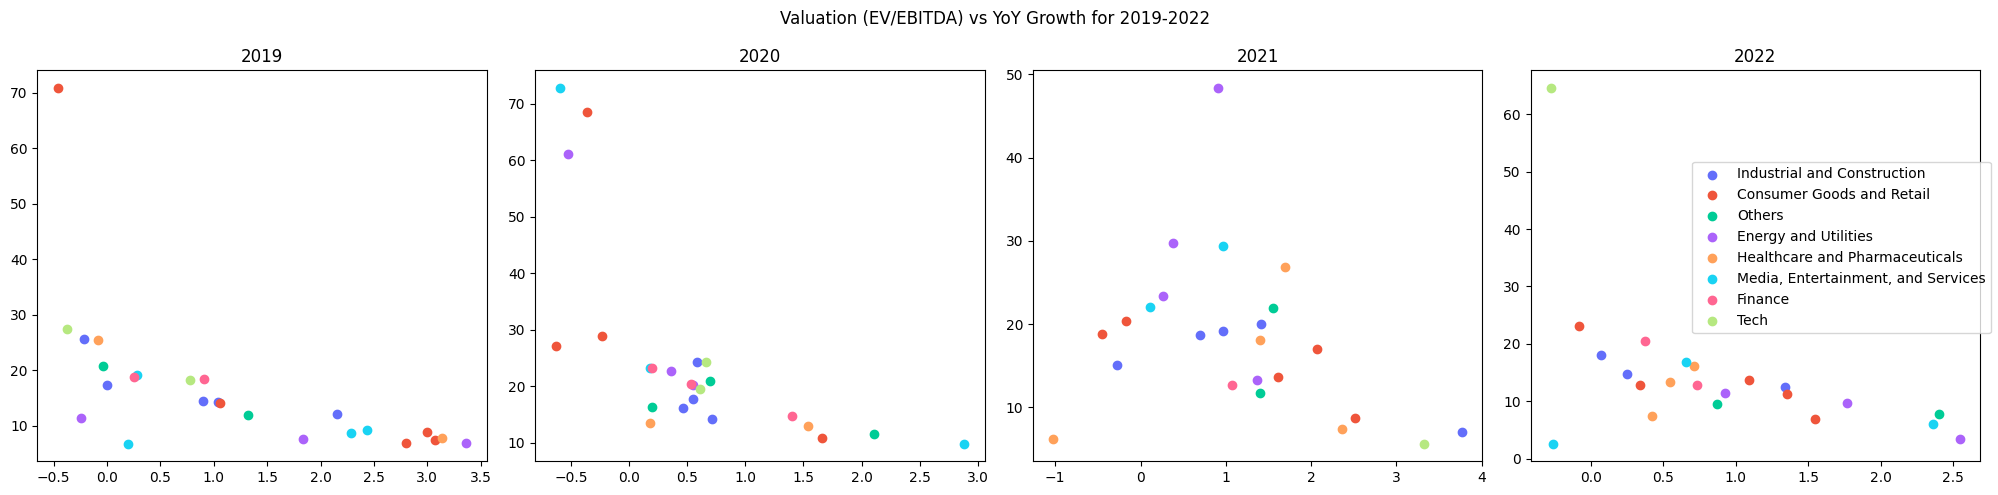

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Define the years we're interested in
years = [2019, 2020, 2021, 2022]

# Create a figure with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Loop over the years
for i, year in enumerate(years):
    # Create a subset of the data for the current year
    yearly_data = industry_filtered[industry_filtered['Year'] == year]

    # Get the unique list of 'Industry Group'
    industry_groups = yearly_data['Industry Group'].unique()

    # Loop over industry_groups
    for j, industry_group in enumerate(industry_groups):
        # Create a new DataFrame for each industry_group
        industry_subset = yearly_data[yearly_data['Industry Group'] == industry_group]

        # Scatter plot
        axs[i].scatter(industry_subset['percentage'], industry_subset['actual'], color=colors[j % len(colors)], label=industry_group)

    # Set title for each subplot
    axs[i].set_title(str(year))

# Add legend
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

# Set overall title
fig.suptitle("Valuation (EV/EBITDA) vs YoY Growth for 2019-2022")

plt.tight_layout()
plt.show()

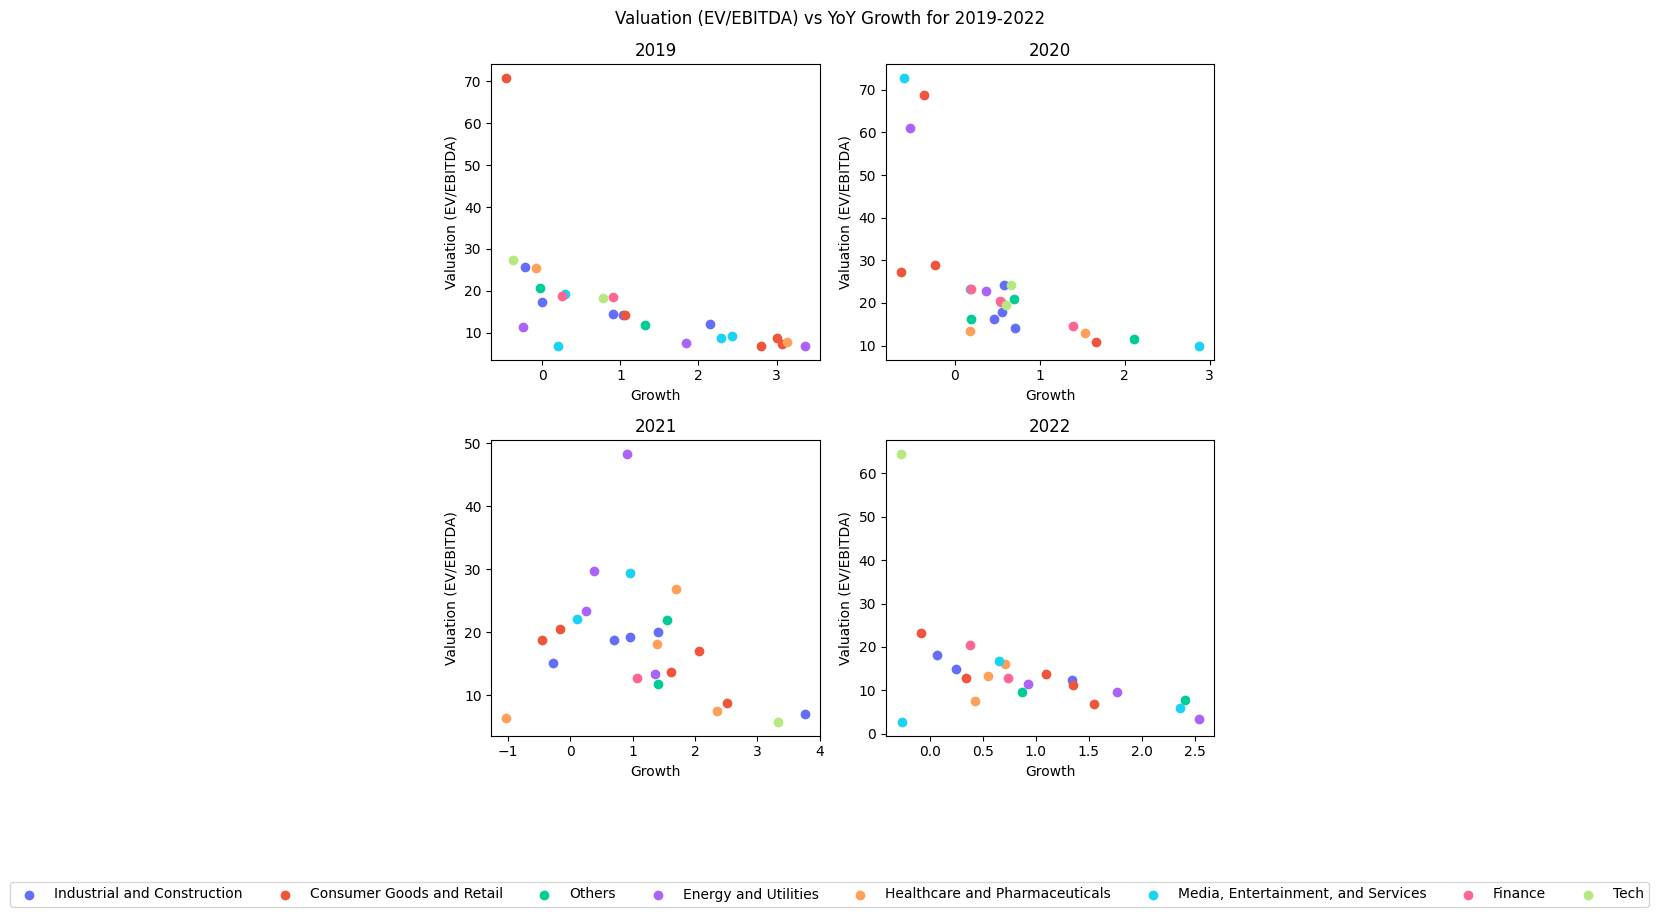

In [200]:
import matplotlib.pyplot as plt
import numpy as np

# Define the years we're interested in
years = [2019, 2020, 2021, 2022]

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs = axs.ravel()  # Flatten the 2x2 grid into a 1D array for easier indexing

# Loop over the years
for i, year in enumerate(years):
    # Create a subset of the data for the current year
    yearly_data = industry_filtered[industry_filtered['Year'] == year]

    # Get the unique list of 'Industry Group'
    industry_groups = yearly_data['Industry Group'].unique()

    # Loop over industry_groups
    for j, industry_group in enumerate(industry_groups):
        # Create a new DataFrame for each industry_group
        industry_subset = yearly_data[yearly_data['Industry Group'] == industry_group]

        # Scatter plot
        axs[i].scatter(industry_subset['percentage'], industry_subset['actual'], color=colors[j % len(colors)], label=industry_group)

    # Set title, x label, and y label for each subplot
    axs[i].set_title(str(year))
    axs[i].set_xlabel("Growth")
    axs[i].set_ylabel("Valuation (EV/EBITDA)")

# Add legend below the subplots
handles, labels = axs[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(industry_groups))

# Adjust layout for better visualization
plt.subplots_adjust(bottom=0.25)

# Set overall title
fig.suptitle("Valuation (EV/EBITDA) vs YoY Growth for 2019-2022")

plt.tight_layout()
plt.show()

In [189]:
# Group by 'TRBC_Industry_encoded' and compute the mean of each column
df_grouped = predictions.groupby('TRBC_Industry_encoded').mean()
df_grouped

Instrument         Year     actual  predictions  \
TRBC_Industry_encoded                                                    
0.0                     78.280000  2020.140000  15.415908    26.084490   
1.0                     31.642857  2020.071429  11.254912    33.213497   
2.0                    127.000000  2018.666667  11.412668    34.283679   
3.0                     64.000000  2019.600000  27.109670    25.359459   
4.0                     47.020408  2019.571429  13.986662    29.344749   
5.0                     93.000000  2021.000000  23.391128    29.245081   
6.0                     89.625000  2019.531250  13.826664    28.340045   
7.0                     97.736842  2019.842105  17.985731    29.736217   
8.0                     62.285714  2021.285714  14.130667    42.172524   
9.0                     53.033333  2019.000000  13.782314    32.378088   
10.0                    38.000000  2019.095238  53.688478    22.565217   
11.0                    99.396226  2019.792453  14.834451    28.371482   
12.0                   130.000000  2021.000000  29.719112    38.899198   
13.0                    46.000000  2018.461538  20.503625    31.219462   
14.0                    83.600000  2019.600000   8.201487    26.483032   
15.0                    62.708333  2020.083333  16.954580    27.492391   
16.0                    27.176471  2018.882353  19.663686    32.353169   
17.0                    58.294118  2019.500000   9.443854    46.569382   
18.0                    43.000000  2020.000000  20.875378    35.270572   
19.0                    73.523810  2020.023810  10.899184    27.205192   
20.0                   101.000000  2021.000000   8.740484    30.756808   
21.0                    94.250000  2018.250000  16.258986    30.265779   
22.0                    77.666667  2019.000000  15.024335    33.524195   
23.0                    86.102041  2019.612245  18.036184    29.262635   
24.0                   109.538462  2019.846154   8.668307    33.956478   
25.0                    44.000000  2018.571429   9.387160    30.507035   
26.0                   117.200000  2018.800000  17.122370    61.840829   
27.0                   110.473684  2018.684211   7.059859    31.306001   
28.0                    84.470588  2020.333333  12.402997    27.191520   
29.0                    19.000000  2020.583333  19.380059    18.998395   
30.0                    43.157895  2020.157895  17.153177    19.024853   
31.0                    92.217391  2019.597826  21.316244    32.268755   
32.0                    14.000000  2021.000000  16.612570    26.776095   
33.0                    65.949495  2019.525253  22.496162    28.567009   
34.0                    71.200000  2020.400000  14.388005    27.411086   
35.0                    78.529412  2019.955882  45.459608    28.803619   
36.0                   111.180328  2019.131148   7.363144    52.898081   
37.0                   112.000000  2022.000000   5.270208    29.111190   

                       percentage  
TRBC_Industry_encoded              
0.0                      0.746004  
1.0                      2.212523  
2.0                      2.449606  
3.0                      0.003217  
4.0                      1.861926  
5.0                      0.259271  
6.0                      1.410666  
7.0                      0.663381  
8.0                      1.920534  
9.0                      1.642217  
10.0                    -0.339717  
11.0                     1.040300  
12.0                     0.379552  
13.0                     0.744917  
14.0                     2.462247  
15.0                     0.869686  
16.0                    -0.124121  
17.0                     4.167169  
18.0                     0.696523  
19.0                     0.562997  
20.0                     2.518891  
21.0                     0.919869  
22.0                     1.619019  
23.0                     0.934001  
24.0                     3.527925  
25.0                     4.432586  
26.0                     2.507542  
27.0              

In [190]:
df_pivot = industry.pivot_table(values='percentage', index='Year', columns='TRBC Industry Group Name')
df_pivot

TRBC Industry Group Name  Aerospace & Defense  Automobiles & Auto Parts  \
Year                                                                      
2018                                 0.114439                  3.832631   
2019                                 0.901575                  3.000369   
2020                                 0.712532                       NaN   
2021                                 0.965780                  1.616978   
2022                                 0.246250                  1.351021   

TRBC Industry Group Name  Beverages  Biotechnology & Medical Research  \
Year                                                                    
2018                       1.207422                          0.939751   
2019                       3.070698                               NaN   
2020                            NaN                         -0.230917   
2021                            NaN                               NaN   
2022                            NaN                               NaN   

TRBC Industry Group Name  Chemicals  Communications & Networking  \
Year                                                               
2018                       3.911436                          NaN   
2019                       1.320172                          NaN   
2020                       0.195125                          NaN   
2021                       1.547603                     0.259271   
2022                       0.869183                          NaN   

TRBC Industry Group Name  Construction & Engineering  Construction Materials  \
Year                                                                           
2018                                        3.753574                0.306065   
2019                                        2.151043                1.035739   
2020                                        0.465327                0.553705   
2021                                       -0.275469                1.413735   
2022                                             NaN                0.066626   

TRBC Industry Group Name  Consumer Goods Conglomerates  \
Year                                                     
2018                                               NaN   
2019                                               NaN   
2020                                               NaN   
2021                                          2.069001   
2022                                          1.549366   

TRBC Industry Group Name  Containers & Packaging  ...  \
Year                                              ...   
2018                                    1.334725  ...   
2019                                   -0.032120  ...   
2020                                    2.110350  ...   
2021                                    1.404240  ...   
2022                                    2.403425  ...   

TRBC Industry Group Name  Oil & Gas Related Equipment and Services  \
Year                                                                 
2018                                                      2.110838   
2019                                                     -0.244579   
2020                                                      1.536070   
2021                                                      1.068505   
2022                                                      0.928545   

TRBC Industry Group Name  Personal & Household Products & Services  \
Year                                                                 
2018                                                           NaN   
2019                                                           NaN   
2020                                                      0.547529   
2021                                                     -0.446809   
2022                                                           NaN   

TRBC Industry Group Name  Pharmaceuticals  Professional & Commercial Services  \
Year                                                  

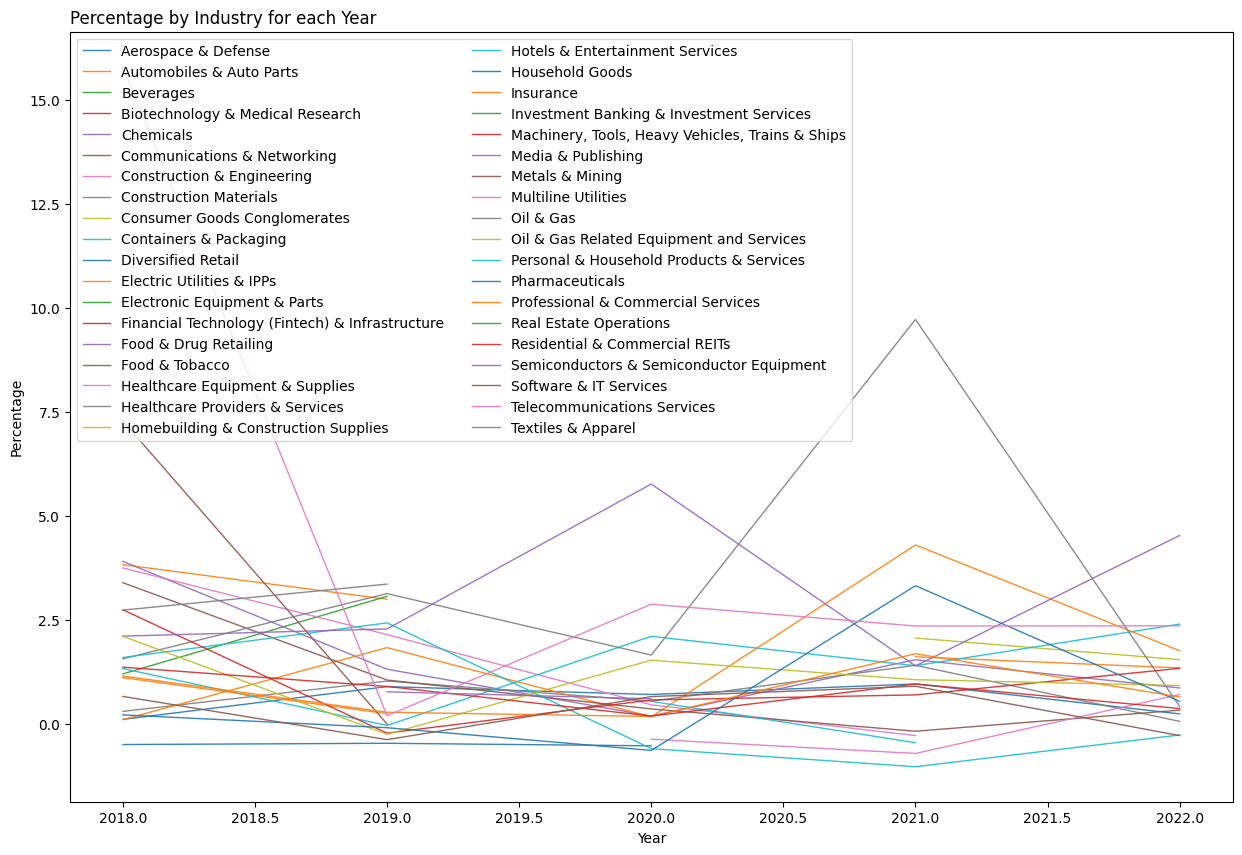

In [191]:
plt.figure(figsize=(15,10))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker='', linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2)
plt.title("Percentage by Industry for each Year", loc='left', fontsize=12, fontweight=0)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.show()

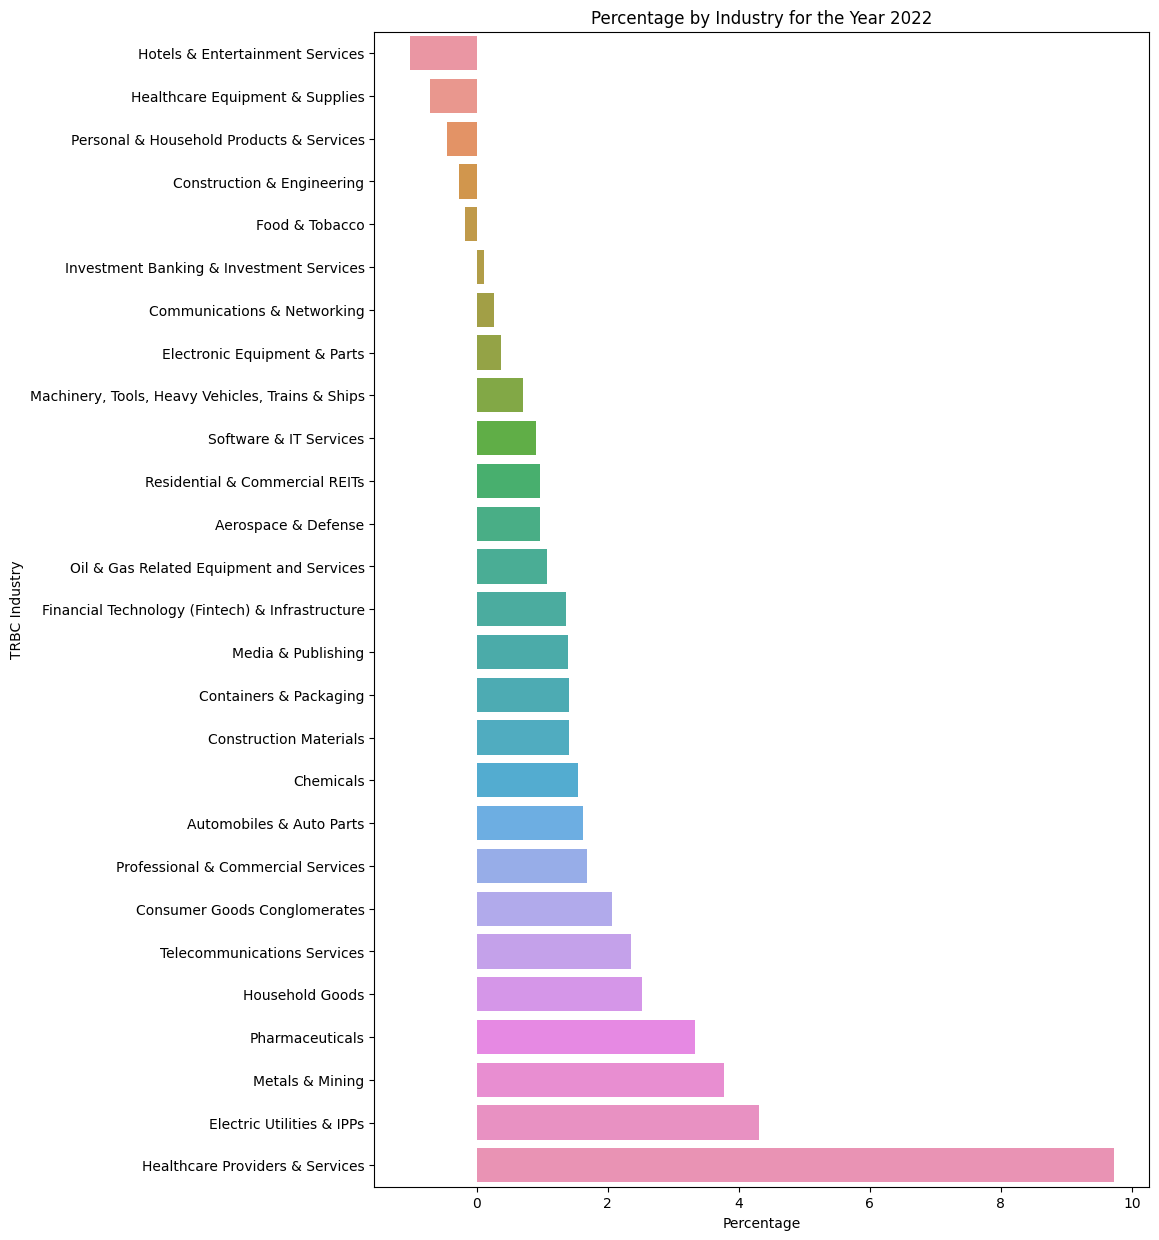

In [192]:
# Filter the data for the year 2022
df_2022 = industry[industry['Year'] == 2021]

# Group by 'TRBC_Industry_encoded' and calculate mean 'percentage'
df_grouped = df_2022.groupby('TRBC Industry Group Name')['percentage'].mean().reset_index()

# Sort the data for better visualization
df_grouped = df_grouped.sort_values(by='percentage')

# Plot
plt.figure(figsize=(10, 15))
sns.barplot(x='percentage', y='TRBC Industry Group Name', data=df_grouped, orient='h')
plt.xlabel('Percentage')
plt.ylabel('TRBC Industry')
plt.title('Percentage by Industry for the Year 2022')
plt.show()


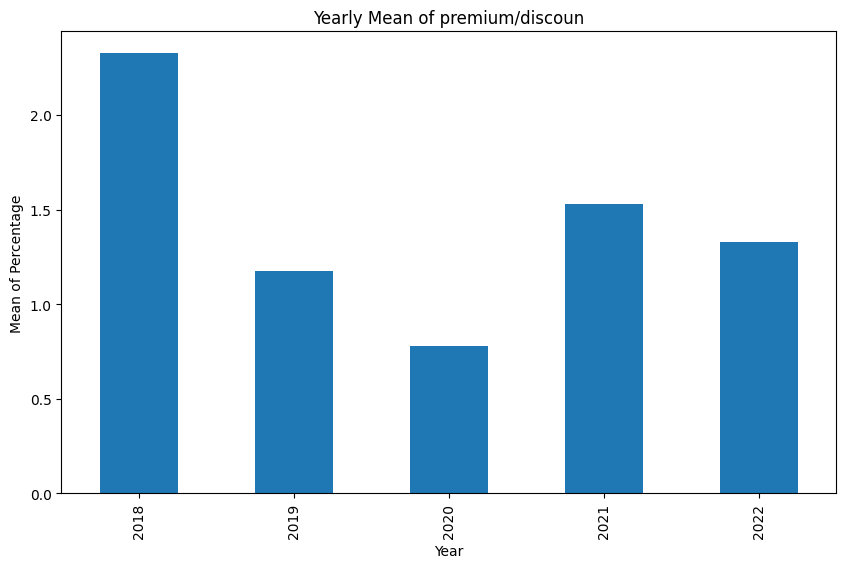

In [193]:
import matplotlib.pyplot as plt

# Group by 'Year' and compute the mean of 'percentage'
df_grouped = industry.groupby(['Year'])['percentage'].mean()

# Create a bar plot
df_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Yearly Mean of premium/discoun')
plt.ylabel('Mean of Percentage')
plt.xlabel('Year')
plt.show()

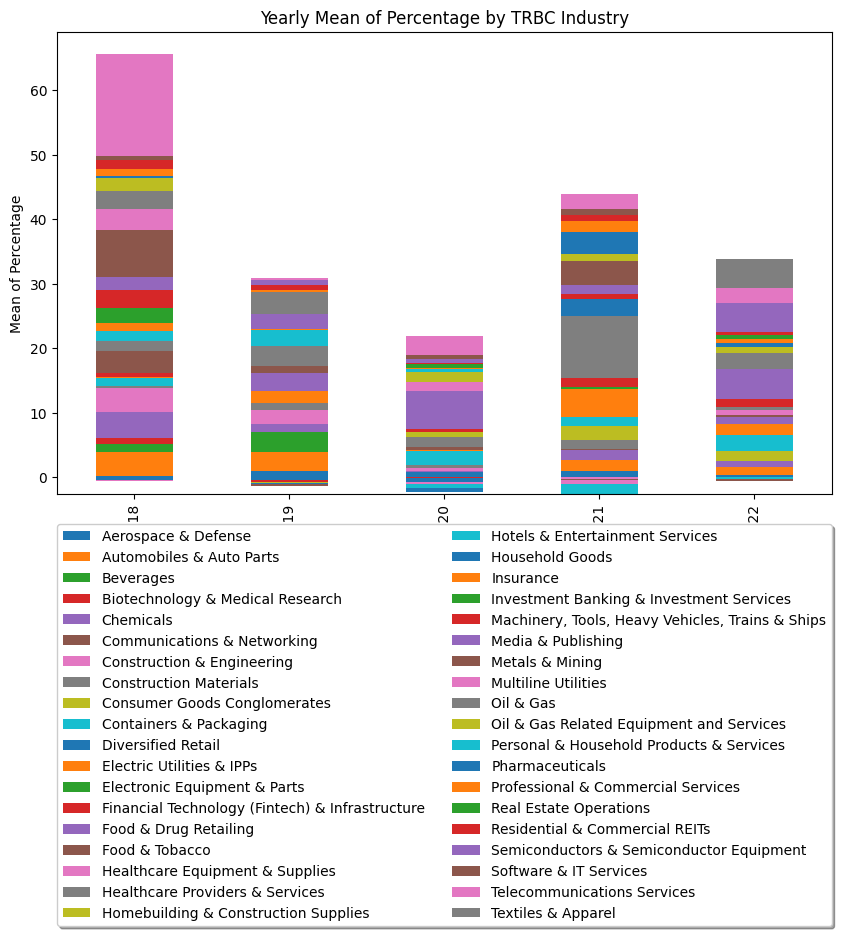

In [194]:
# Pivot the data
pivot_df = industry.pivot(index='Year', columns='TRBC Industry Group Name', values='percentage')

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Yearly Mean of Percentage by TRBC Industry')
plt.ylabel('Mean of Percentage')
plt.xlabel('Year')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)
plt.show()

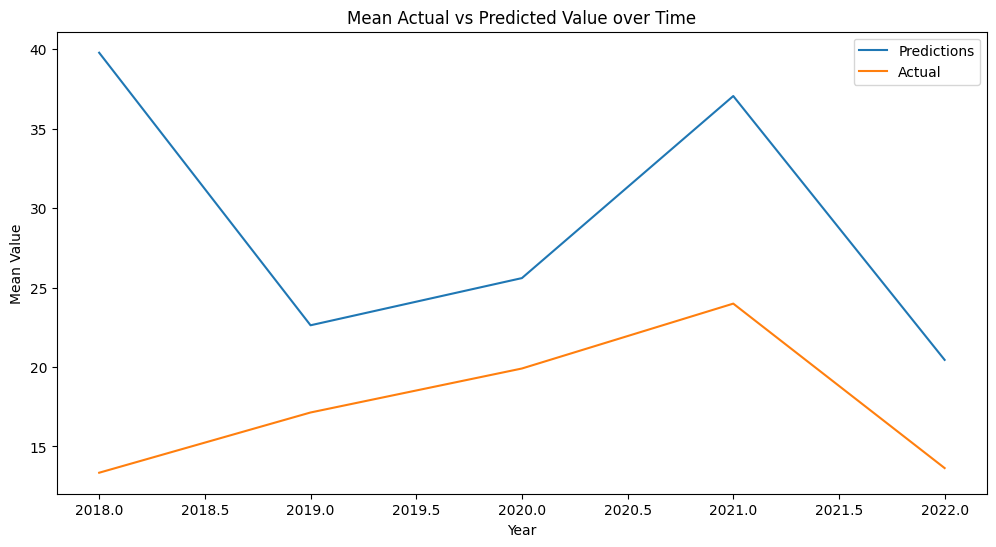

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# REMOVE THE TRASNFORMATIONS

# Group the data by 'Year' and calculate the mean of 'predictions' and 'actual'
df_grouped = predictions.groupby('Year')[['actual', 'predictions']].mean().reset_index()

plt.figure(figsize=(12, 6))

# Create a line plot of the mean 'predictions' over 'Year'
sns.lineplot(data=df_grouped, x='Year', y='predictions', label='Predictions')

# Create a line plot of the mean 'actual' over 'Year'
sns.lineplot(data=df_grouped, x='Year', y='actual', label='Actual')

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Actual vs Predicted Value over Time')
plt.legend()
plt.show()

In [196]:
df_grouped

Year     actual  predictions
0  2018  13.343350    39.786790
1  2019  17.135990    22.626402
2  2020  19.905012    25.596803
3  2021  23.990361    37.060139
4  2022  13.635495    20.447440

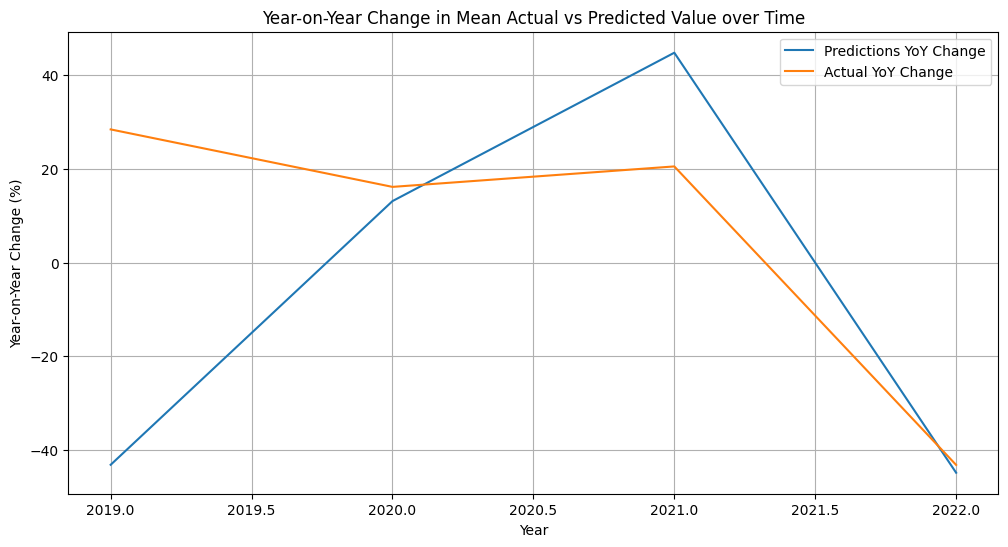

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# REMOVE THE TRASNFORMATIONS

# Group the data by 'Year' and calculate the mean of 'predictions' and 'actual'
df_grouped = predictions.groupby('Year')[['actual', 'predictions']].mean().reset_index()

# Calculate year-on-year change for 'actual' and 'predictions'
df_grouped['actual_yoy_change'] = df_grouped['actual'].pct_change() * 100
df_grouped['predictions_yoy_change'] = df_grouped['predictions'].pct_change() * 100

plt.figure(figsize=(12, 6))

# Create a line plot of the year-on-year change of 'predictions' over 'Year'
sns.lineplot(data=df_grouped, x='Year', y='predictions_yoy_change', label='Predictions YoY Change')

# Create a line plot of the year-on-year change of 'actual' over 'Year'
sns.lineplot(data=df_grouped, x='Year', y='actual_yoy_change', label='Actual YoY Change')

plt.xlabel('Year')
plt.ylabel('Year-on-Year Change (%)')
plt.title('Year-on-Year Change in Mean Actual vs Predicted Value over Time')
plt.legend()
plt.grid(True)
plt.show()

In [198]:
df_grouped

Year     actual  predictions  actual_yoy_change  predictions_yoy_change
0  2018  13.343350    39.786790                NaN                     NaN
1  2019  17.135990    22.626402          28.423445              -43.130868
2  2020  19.905012    25.596803          16.159104               13.128032
3  2021  23.990361    37.060139          20.524220               44.784245
4  2022  13.635495    20.447440         -43.162611              -44.826327